In [3]:
# Data manipulation and numerical operations
import numpy as np  # Essential for numerical operations
import pandas as pd  # For data manipulation and analysis

# Visualization libraries
import matplotlib.pyplot as plt  # General-purpose plotting
import seaborn as sns  # Statistical data visualization based on matplotlib
import plotly.express as px  # Interactive visualization, a more modern and flexible alternative to matplotlib
from matplotlib import gridspec 

# Machine learning libraries
from sklearn.model_selection import train_test_split  # Split dataset into train and test
from sklearn.preprocessing import StandardScaler  # For feature scaling
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline  # To streamline transformations and models in a pipeline
from sklearn.metrics import accuracy_score, confusion_matrix  # Common performance metrics

# OS-related operations
import os  # Operating system-related utilities
import warnings
warnings.filterwarnings('ignore')

In [4]:
!pip install xgboost

In [5]:
!pip install catboost

In [6]:
passengers = pd.read_csv('airline_passenger_satisfaction.csv')

In [7]:
#first few rows of dataset
passengers.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2.0,5.0,3.0,...,3.0,5.0,2,5.0,5.0,5.0,3,5.0,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26.0,39.0,2.0,...,5.0,4.0,5,5.0,3.0,5.0,2,5.0,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0.0,0.0,4.0,...,3.0,5.0,3,5.0,5.0,3.0,4,3.0,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0.0,0.0,2.0,...,5.0,5.0,5,4.0,4.0,5.0,2,5.0,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0.0,1.0,3.0,...,3.0,4.0,4,5.0,4.0,3.0,3,3.0,3,Satisfied


In [8]:
#number of rows, number of columns in dataset
passengers.shape

(129892, 24)

In [9]:
#check dataset's info
passengers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129892 entries, 0 to 129891
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129892 non-null  int64  
 1   Gender                                  129892 non-null  object 
 2   Age                                     129892 non-null  int64  
 3   Customer Type                           129892 non-null  object 
 4   Type of Travel                          129892 non-null  object 
 5   Class                                   129892 non-null  object 
 6   Flight Distance                         129892 non-null  int64  
 7   Departure Delay                         129890 non-null  float64
 8   Arrival Delay                           129497 non-null  float64
 9   Departure and Arrival Time Convenience  129891 non-null  float64
 10  Ease of Online Booking                  1298

In [10]:
#drop [id] columns because it's not necessary
passengers.drop(['ID'], axis=1, inplace=True)

In [11]:
# Rename columns
passengers = passengers.rename(columns={
    'Gender': 'gender',
    'Age': 'age',
    'Customer Type': 'customer_type',
    'Type of Travel': 'travel_type',
    'Class': 'class',
    'Flight Distance': 'distance',
    'Departure Delay': 'departure_delay_minutes',
    'Arrival Delay': 'arrival_delay_minutes',
    'Departure and Arrival Time Convenience': 'dep_val_time_convenient',
    'Ease of Online Booking': 'online_booking_service',
    'Check-in Service': 'checkin_service',
    'Online Boarding': 'online_boarding',
    'Gate Location': 'gate',
    'On-board Service': 'onboard_service',
    'Seat Comfort': 'seat_comfort',
    'Leg Room Service': 'leg_room_service',
    'Cleanliness': 'cleanliness',
    'Food and Drink': 'food_drink',
    'In-flight Service': 'inflight_service',
    'In-flight Wifi Service': 'wifi_service',
    'In-flight Entertainment': 'entertainment',
    'Baggage Handling': 'baggage_handling',
    'Satisfaction': 'satisfaction'
})

In [12]:
#show the columns title
passengers.columns

Index(['gender', 'age', 'customer_type', 'travel_type', 'class', 'distance',
       'departure_delay_minutes', 'arrival_delay_minutes',
       'dep_val_time_convenient', 'online_booking_service', 'checkin_service',
       'online_boarding', 'gate', 'onboard_service', 'seat_comfort',
       'leg_room_service', 'cleanliness', 'food_drink', 'inflight_service',
       'wifi_service', 'entertainment', 'baggage_handling', 'satisfaction'],
      dtype='object')

In [13]:
#check the missing value
passengers.isna().sum().sort_values(ascending=False)

arrival_delay_minutes      395
cleanliness                  5
onboard_service              4
online_boarding              3
entertainment                2
inflight_service             2
departure_delay_minutes      2
checkin_service              2
food_drink                   2
dep_val_time_convenient      1
online_booking_service       1
seat_comfort                 1
leg_room_service             0
baggage_handling             0
wifi_service                 0
gender                       0
gate                         0
age                          0
distance                     0
class                        0
travel_type                  0
customer_type                0
satisfaction                 0
dtype: int64

In [14]:
#We have 395 missing value in the "Arrival Delay in Minutes" column.
#Let's examinethe column in detail to decide the imputation method.
passengers["arrival_delay_minutes"].describe()

count    129497.000000
mean         15.090658
std          38.464343
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max        1584.000000
Name: arrival_delay_minutes, dtype: float64

In [15]:
#Finding Mode of the variable
passengers["arrival_delay_minutes"].value_counts().nlargest(10)

arrival_delay_minutes
0.0    72756
1.0     2748
2.0     2587
3.0     2442
4.0     2373
5.0     2083
6.0     2021
7.0     1794
8.0     1753
9.0     1566
Name: count, dtype: int64

In [16]:
# Replace all 0 (mode) values with 0.0 (float) in 'arrival_delay_minutes' column
passengers['arrival_delay_minutes'] = passengers['arrival_delay_minutes'].replace(0, 0.0)

In [17]:
passengers["arrival_delay_minutes"].value_counts().nlargest(10)

arrival_delay_minutes
0.0    72756
1.0     2748
2.0     2587
3.0     2442
4.0     2373
5.0     2083
6.0     2021
7.0     1794
8.0     1753
9.0     1566
Name: count, dtype: int64

In [18]:
# Calculate the proportion of rows where 'arrival_delay_minutes' is 0
len(passengers[passengers["arrival_delay_minutes"]==0 ])/len(passengers)

0.5601268746343115

In [19]:
# Calculate the proportion of missing values in 'arrival_delay_minutes'
400/len(passengers)

0.0030794814153296585

In [20]:
#More than half of the data has value of 0 so it would be reasonable to set 
#the missing values as zero for the 400 missing rows
passengers['arrival_delay_minutes'].fillna(0, inplace=True)

In [21]:
#check the missing value
passengers.isna().sum().sort_values(ascending=False)

cleanliness                5
onboard_service            4
online_boarding            3
entertainment              2
inflight_service           2
departure_delay_minutes    2
food_drink                 2
checkin_service            2
seat_comfort               1
dep_val_time_convenient    1
online_booking_service     1
baggage_handling           0
wifi_service               0
leg_room_service           0
gender                     0
gate                       0
age                        0
arrival_delay_minutes      0
distance                   0
class                      0
travel_type                0
customer_type              0
satisfaction               0
dtype: int64

In [22]:
#as only small number of rows have missing values for departure_delay_minutes,online_booking_service,Departure and Arrival Time Convenience,Check-in Service and online_boarding
#we can drop these rows
passengers.dropna(inplace=True)

In [23]:
#check the missing value
passengers.isna().sum().sort_values(ascending=False)

gender                     0
gate                       0
baggage_handling           0
entertainment              0
wifi_service               0
inflight_service           0
food_drink                 0
cleanliness                0
leg_room_service           0
seat_comfort               0
onboard_service            0
online_boarding            0
age                        0
checkin_service            0
online_booking_service     0
dep_val_time_convenient    0
arrival_delay_minutes      0
departure_delay_minutes    0
distance                   0
class                      0
travel_type                0
customer_type              0
satisfaction               0
dtype: int64

In [24]:
#after handling missing values no of rows and columns
passengers.shape

(129867, 23)

In [25]:
#check for dupliate values
passengers.duplicated().sum()

11

In [26]:
#remove duplicate values
passengers_cleaned = passengers.drop_duplicates()

In [27]:
passengers_cleaned.duplicated().sum()

0

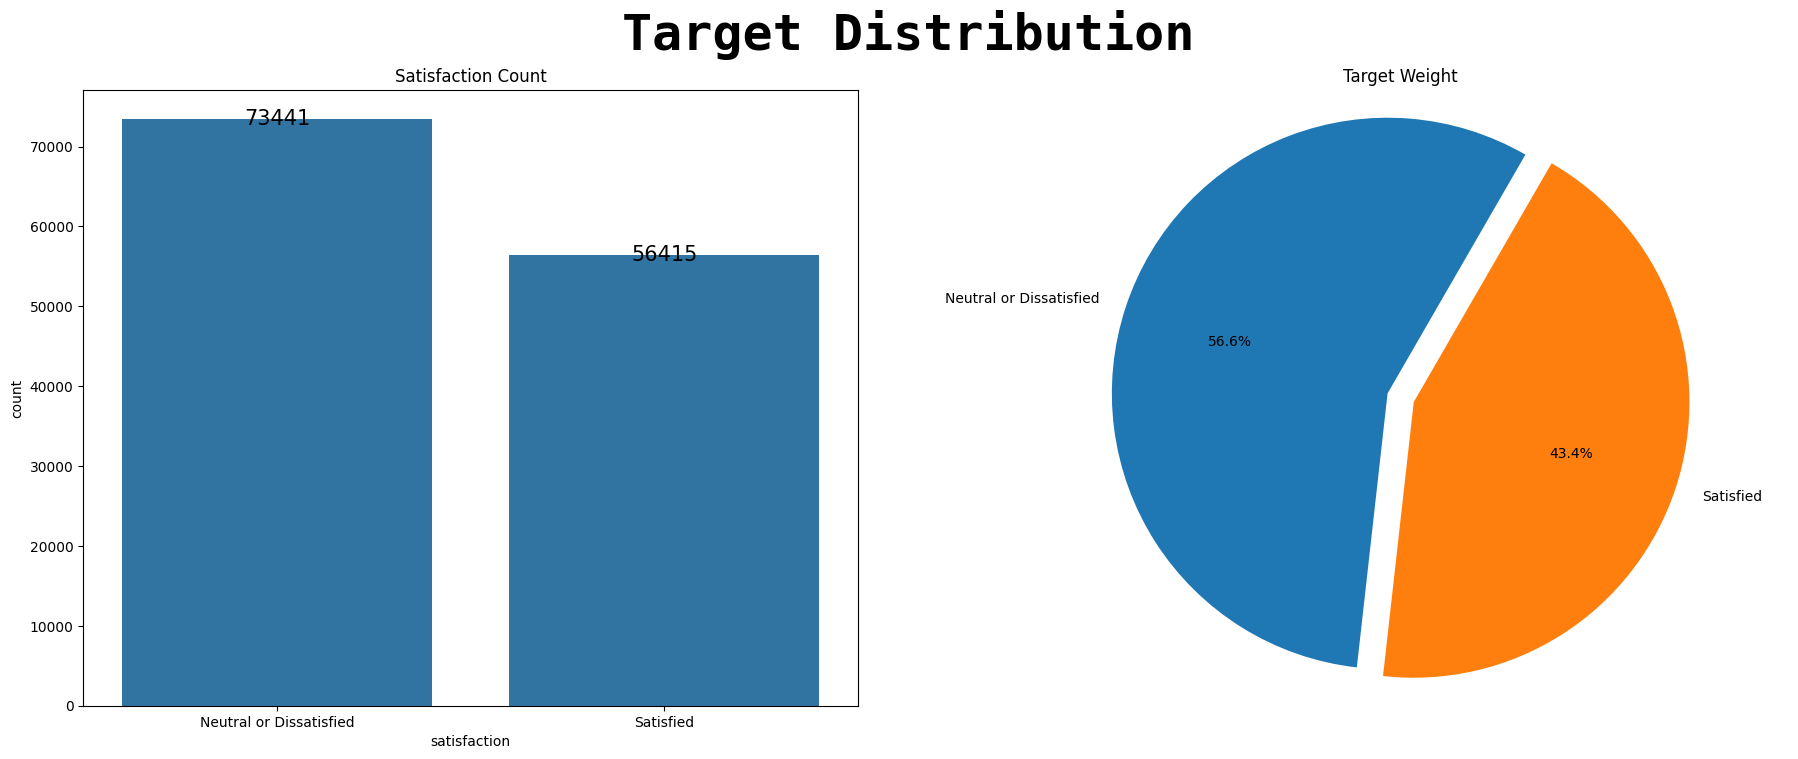

In [28]:
# Define the figure
fig = plt.figure(figsize=(22, 8))
plt.suptitle('Target Distribution', weight="bold", fontsize=36, fontname='monospace')
grid = gridspec.GridSpec(nrows=1, ncols=2, figure=fig)

# First subplot: Satisfaction Count
ax1 = fig.add_subplot(grid[0,:1])
ax1.set_title('Satisfaction Count')
sns.countplot(x='satisfaction', data=passengers_cleaned, ax=ax1)

# Annotating bars with values
for index, value in enumerate(passengers_cleaned['satisfaction'].value_counts()):
    ax1.annotate(value, xy=(index, value), ha='center', va='center', fontsize=15)

# Second subplot: Target Weight (Pie chart)
ax2 = fig.add_subplot(grid[0,1:])
ax2.set_title('Target Weight')

# Get labels and values for the pie chart
labels = passengers_cleaned['satisfaction'].value_counts().index
values = passengers_cleaned['satisfaction'].value_counts().values

# Dynamically create explode based on the number of categories
explode = [0.1 if i == values.argmax() else 0 for i in range(len(values))]

# Draw pie chart
ax2.pie(values, labels=labels, autopct='%1.1f%%', explode=explode, startangle=60)
ax2.axis('equal')

# Show the plot
plt.show()


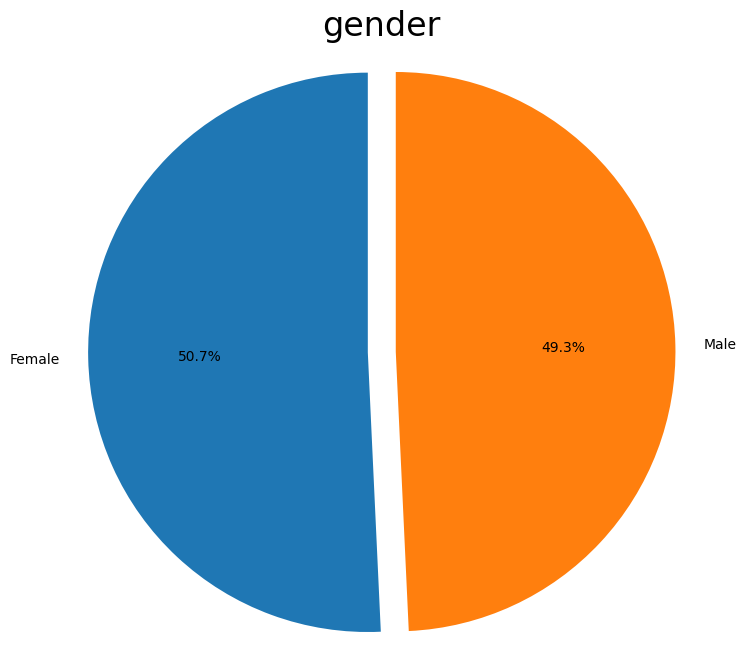

In [29]:
# Define the figure size
plt.figure(figsize=(8, 8))

# Plot the pie chart
plt.title('gender', fontsize=24)

labels = passengers_cleaned['gender'].value_counts().index
values = passengers_cleaned['gender'].value_counts().values

# Dynamically create explode based on the largest category
explode = [0.1 if i == values.argmax() else 0 for i in range(len(values))]

# Draw the pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%', explode=explode, startangle=90)

# Ensure the pie is drawn as a circle
plt.axis('equal')

# Show the plot
plt.show()

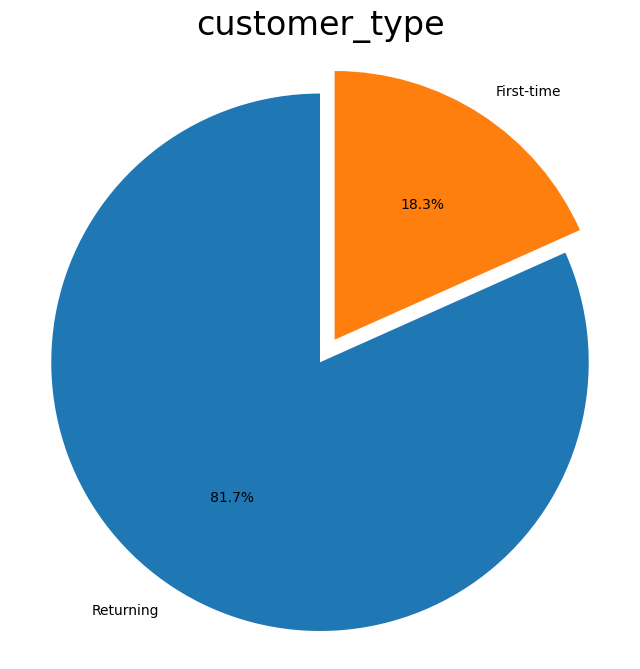

In [30]:
# Define the figure size
plt.figure(figsize=(8, 8))

# Plot the pie chart
plt.title('customer_type', fontsize=24)

labels = passengers_cleaned['customer_type'].value_counts().index
values = passengers_cleaned['customer_type'].value_counts().values

# Dynamically create explode based on the largest category
explode = [0.1 if i == values.argmax() else 0 for i in range(len(values))]

# Draw the pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%', explode=explode, startangle=90)

# Ensure the pie is drawn as a circle
plt.axis('equal')

# Show the plot
plt.show()

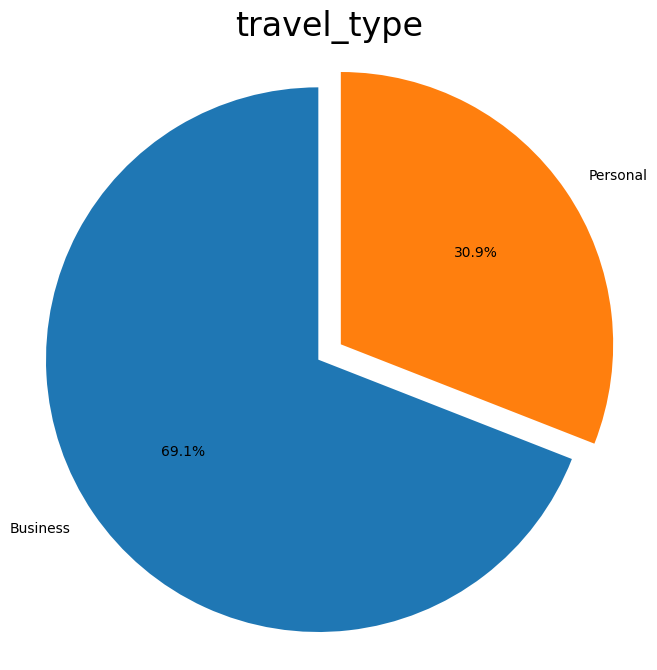

In [31]:
# Define the figure size
plt.figure(figsize=(8, 8))

# Plot the pie chart
plt.title('travel_type', fontsize=24)

labels = passengers_cleaned['travel_type'].value_counts().index
values = passengers_cleaned['travel_type'].value_counts().values

# Dynamically create explode based on the largest category
explode = [0.1 if i == values.argmax() else 0 for i in range(len(values))]

# Draw the pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%', explode=explode, startangle=90)

# Ensure the pie is drawn as a circle
plt.axis('equal')

# Show the plot
plt.show()

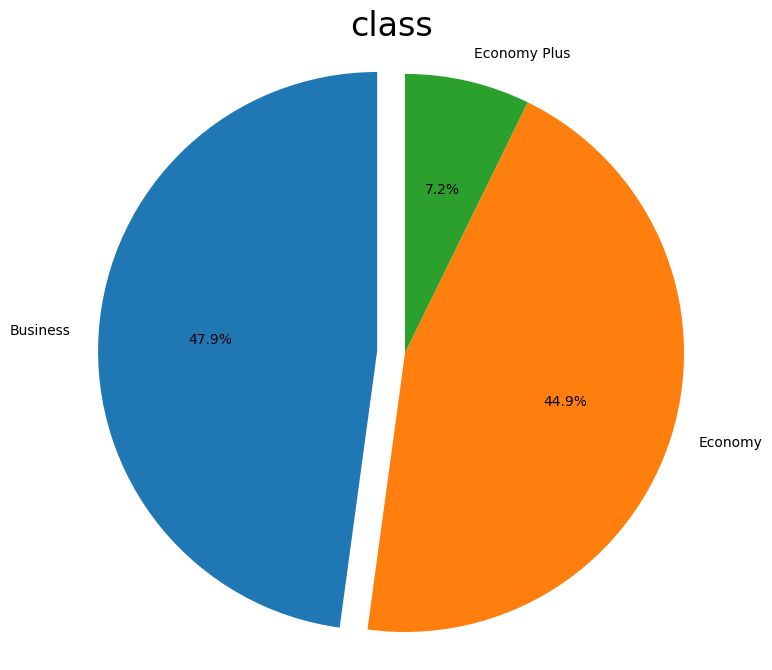

In [32]:
# Define the figure size
plt.figure(figsize=(8, 8))

# Plot the pie chart
plt.title('class', fontsize=24)

labels = passengers_cleaned['class'].value_counts().index
values = passengers_cleaned['class'].value_counts().values

# Dynamically create explode based on the largest category
explode = [0.1 if i == values.argmax() else 0 for i in range(len(values))]

# Draw the pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%', explode=explode, startangle=90)

# Ensure the pie is drawn as a circle
plt.axis('equal')

# Show the plot
plt.show()

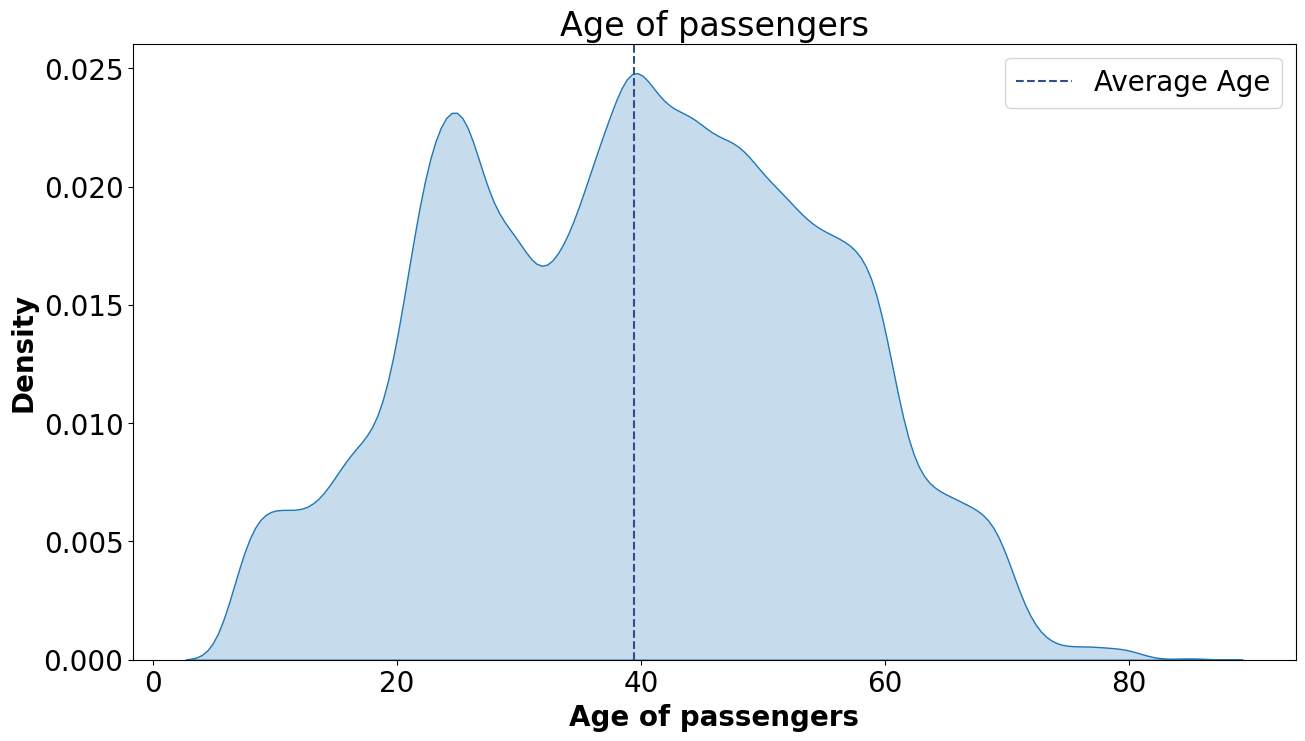

In [33]:
# Define the figure size
plt.figure(figsize=(15,8))

# Plot KDE for Age
plt.title('Age of passengers', fontsize=24)
sns.kdeplot(passengers_cleaned['age'], fill=True)

# Customize ticks and labels
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Age of passengers', fontsize=20, weight='bold')
plt.ylabel('Density', fontsize=20, weight='bold')

# Add a vertical line for the mean age
plt.axvline(passengers_cleaned['age'].mean(), linestyle='--', color='#324D8B', label='Average Age')

# Add legend
plt.legend(fontsize=20)

# Show the plot
plt.show()

### not impbalaced not balanced also

In [34]:
# Identify categorical features based on dtype
cat_features = [feature for feature in passengers_cleaned.columns if passengers_cleaned[feature].dtype == 'object']

# Print the results
print('Number of categorical variables:', len(cat_features))
print('Names of categorical variables:', cat_features)

Number of categorical variables: 5
Names of categorical variables: ['gender', 'customer_type', 'travel_type', 'class', 'satisfaction']


In [35]:
#numerical features
num_features = [feature for feature in passengers_cleaned.columns if passengers_cleaned[feature].dtypes != 'O']
print('Number of numerical variables: ', len(num_features))
print('Name of numerical variables: ',num_features)

Number of numerical variables:  18
Name of numerical variables:  ['age', 'distance', 'departure_delay_minutes', 'arrival_delay_minutes', 'dep_val_time_convenient', 'online_booking_service', 'checkin_service', 'online_boarding', 'gate', 'onboard_service', 'seat_comfort', 'leg_room_service', 'cleanliness', 'food_drink', 'inflight_service', 'wifi_service', 'entertainment', 'baggage_handling']


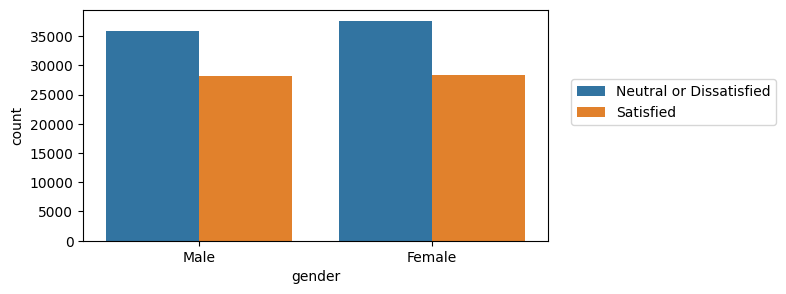

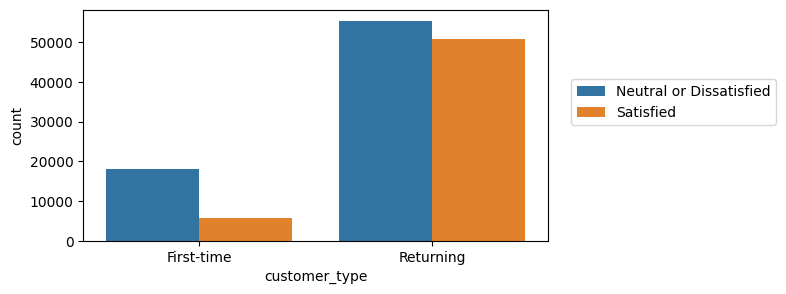

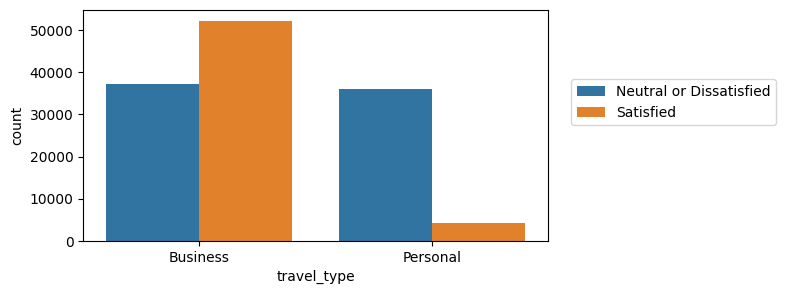

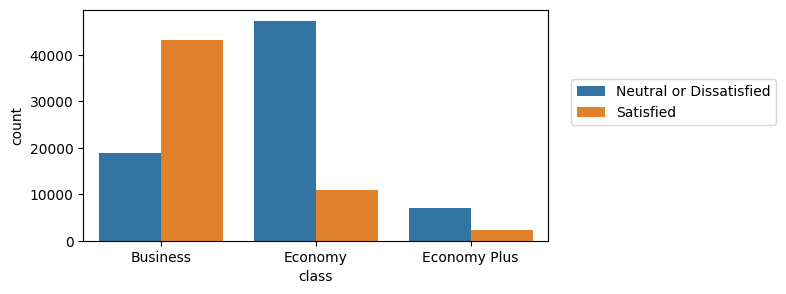

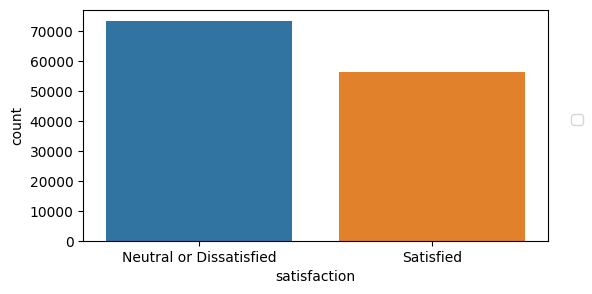

In [36]:
#Category Data Type Visualization
for col in cat_features:
    plt.figure(figsize=(6,3), dpi=100)
    sns.countplot(data=passengers_cleaned,x=col,hue ='satisfaction')
    plt.legend(loc=(1.05,0.5))
    passengers['satisfaction'].value_counts()

In [37]:
for cols in cat_features:
    cat_group = passengers_cleaned.groupby(cols)['satisfaction'].describe()
    percent = 100 * (cat_group['freq'] / cat_group['count'])
    print('*' * 65)
    print("Insights from '{}' data".format(cols))
    for i in range(len(cat_group)):
        # Use iloc for positional indexing to avoid FutureWarning
        print('{} from {} are {}'.format(round(percent.iloc[i], 2), percent.index[i], cat_group['top'].iloc[i]))
    print('*' * 65)


*****************************************************************
Insights from 'gender' data
57.1 from Female are Neutral or Dissatisfied
55.99 from Male are Neutral or Dissatisfied
*****************************************************************
*****************************************************************
Insights from 'customer_type' data
76.03 from First-time are Neutral or Dissatisfied
52.19 from Returning are Neutral or Dissatisfied
*****************************************************************
*****************************************************************
Insights from 'travel_type' data
58.37 from Business are Satisfied
89.87 from Personal are Neutral or Dissatisfied
*****************************************************************
*****************************************************************
Insights from 'class' data
69.44 from Business are Satisfied
81.23 from Economy are Neutral or Dissatisfied
75.36 from Economy Plus are Neutral or Dissatisfied
************

From the results of the visualization and insight above, it can be seen that:

'gender' does not have a significant difference so it does not really affect 'satisfaction'.
The number of loyal customers at this airline is quite high and many of them are satisfied, even so, almost half of loyal customers are also neutral or dissatisfied.
Customers traveling for business were more satisfied than those traveling for personal use, however the level of dissatisfaction, for both personal and private travel, was also very high.
Passengers in business class seem to be more satisfied than those in economy class.

In [38]:
passengers_cleaned.columns

Index(['gender', 'age', 'customer_type', 'travel_type', 'class', 'distance',
       'departure_delay_minutes', 'arrival_delay_minutes',
       'dep_val_time_convenient', 'online_booking_service', 'checkin_service',
       'online_boarding', 'gate', 'onboard_service', 'seat_comfort',
       'leg_room_service', 'cleanliness', 'food_drink', 'inflight_service',
       'wifi_service', 'entertainment', 'baggage_handling', 'satisfaction'],
      dtype='object')

In [39]:
passengers_cleaned['online_booking_service'].value_counts()

online_booking_service
3.0    30388
2.0    30045
4.0    24439
1.0    21881
5.0    17423
0.0     5680
Name: count, dtype: int64

In [40]:
ordinal_dict={5:'Excellant',
              4:'Very Good',
              3:'Good',
              2:'Bad',
              1:'Very Bad',
              0:'Not reported'}
passengers_cleaned_analysis=passengers_cleaned.copy()
passengers_cleaned_analysis.loc[:,'online_booking_service']=passengers_cleaned_analysis['online_booking_service'].map(ordinal_dict)

In [41]:
passengers_cleaned_analysis['online_booking_service'].value_counts()

online_booking_service
Good            30388
Bad             30045
Very Good       24439
Very Bad        21881
Excellant       17423
Not reported     5680
Name: count, dtype: int64

In [42]:
def CalPercentage(passengers_cleaned_analysis, col):
    new_df = pd.DataFrame(passengers_cleaned_analysis[col].value_counts()).reset_index()
    new_df.columns = [col, 'count']  # Rename columns
    new_df['percentage'] = round((new_df['count'] / new_df['count'].sum()) * 100, 2)
    return new_df

In [43]:
def Visualization(passengers_cleaned_analysis, col):
    df_per = CalPercentage(passengers_cleaned_analysis, col)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 6))
    plt.suptitle(col, fontsize=24, fontname='monospace', weight='bold')
    plt.subplots_adjust(hspace=0.9)

    sns.barplot(x=df_per[col], y='percentage', data=df_per, ax=ax1)
    sns.countplot(x=col, data=passengers_cleaned_analysis, hue='satisfaction', ax=ax2)

    ax1.set_xticklabels(df_per[col], rotation=45)
    ax1.set_xlabel('Experience', fontsize=20)

    ax2.set_xlabel(col, fontsize=20)
    ax2.set_xticklabels(df_per[col], rotation=45)

    plt.show()

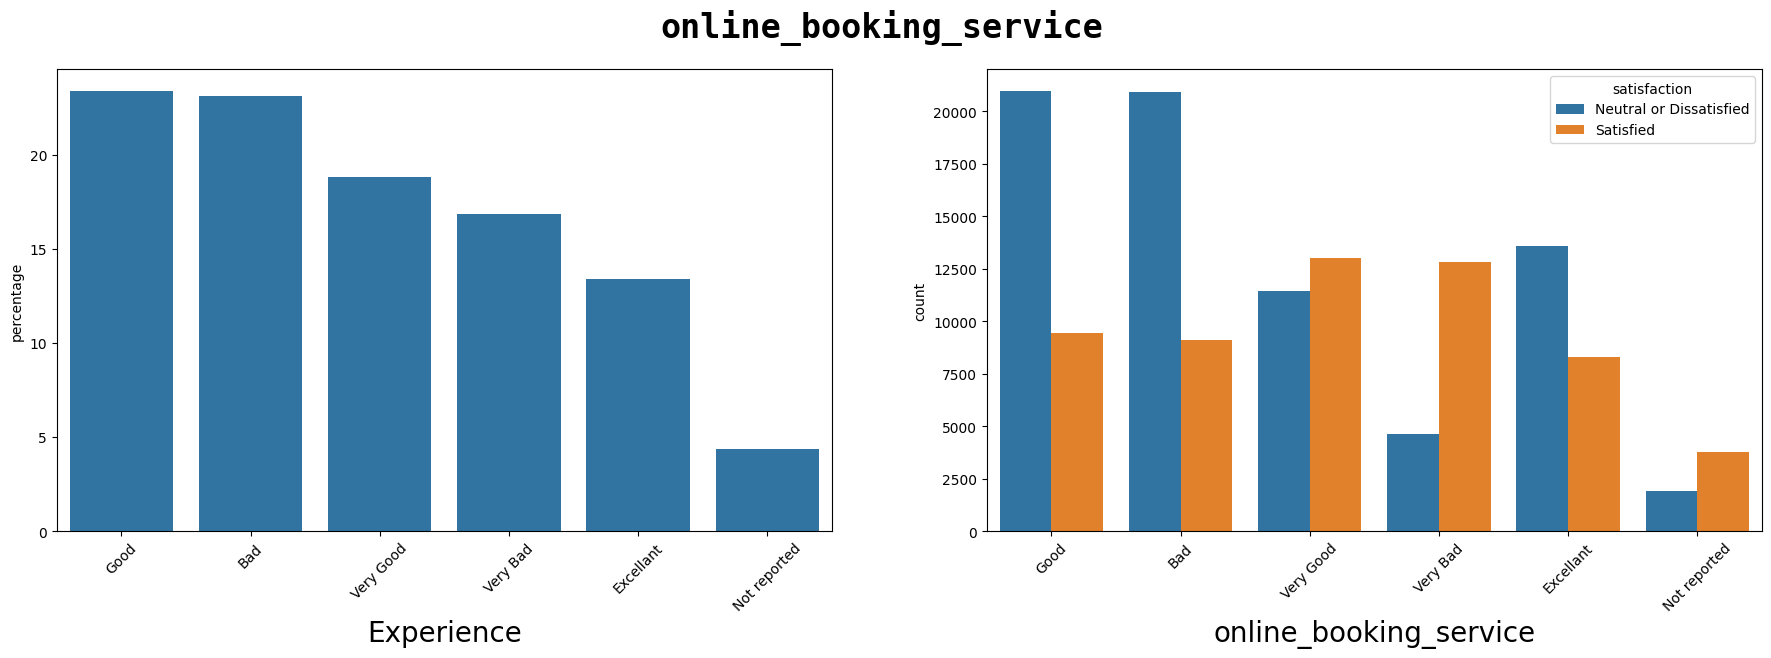

In [44]:
Visualization(passengers_cleaned_analysis, 'online_booking_service')

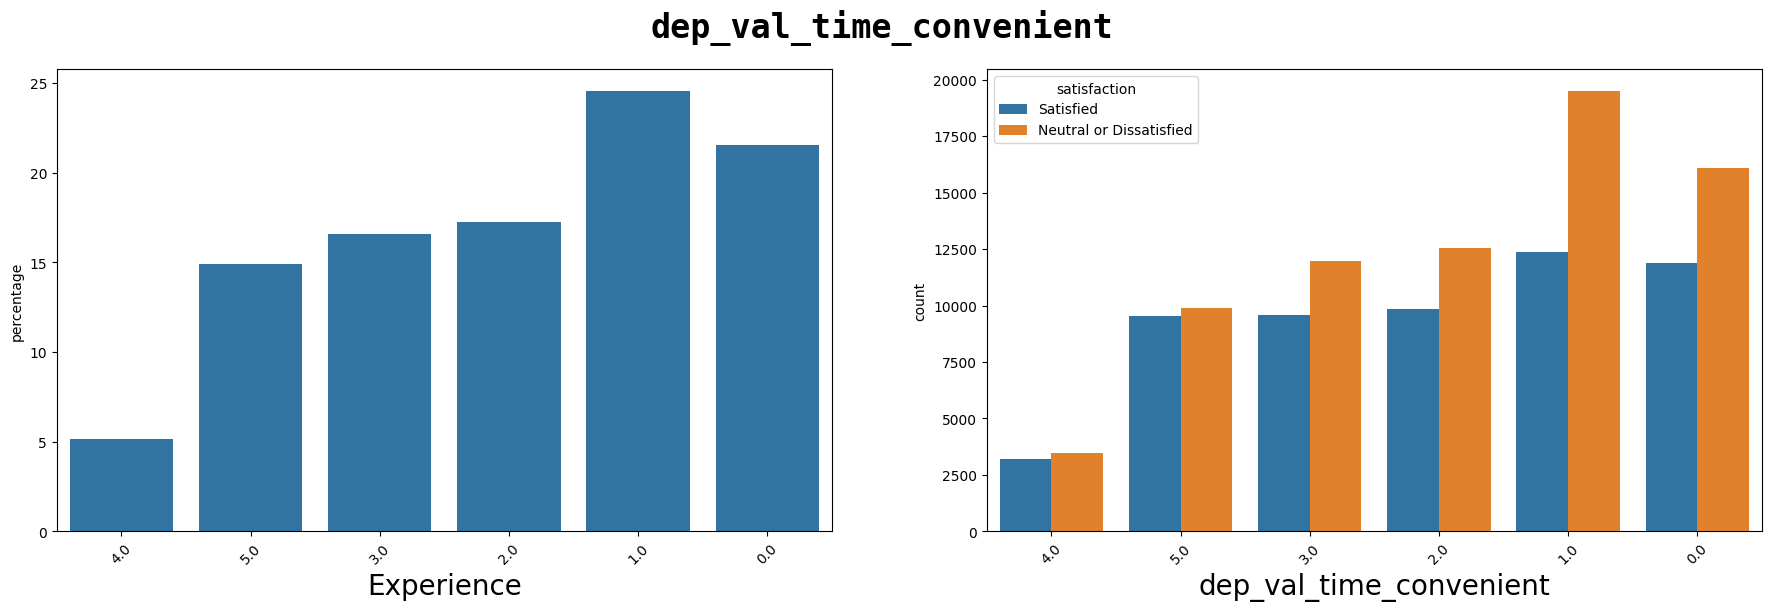

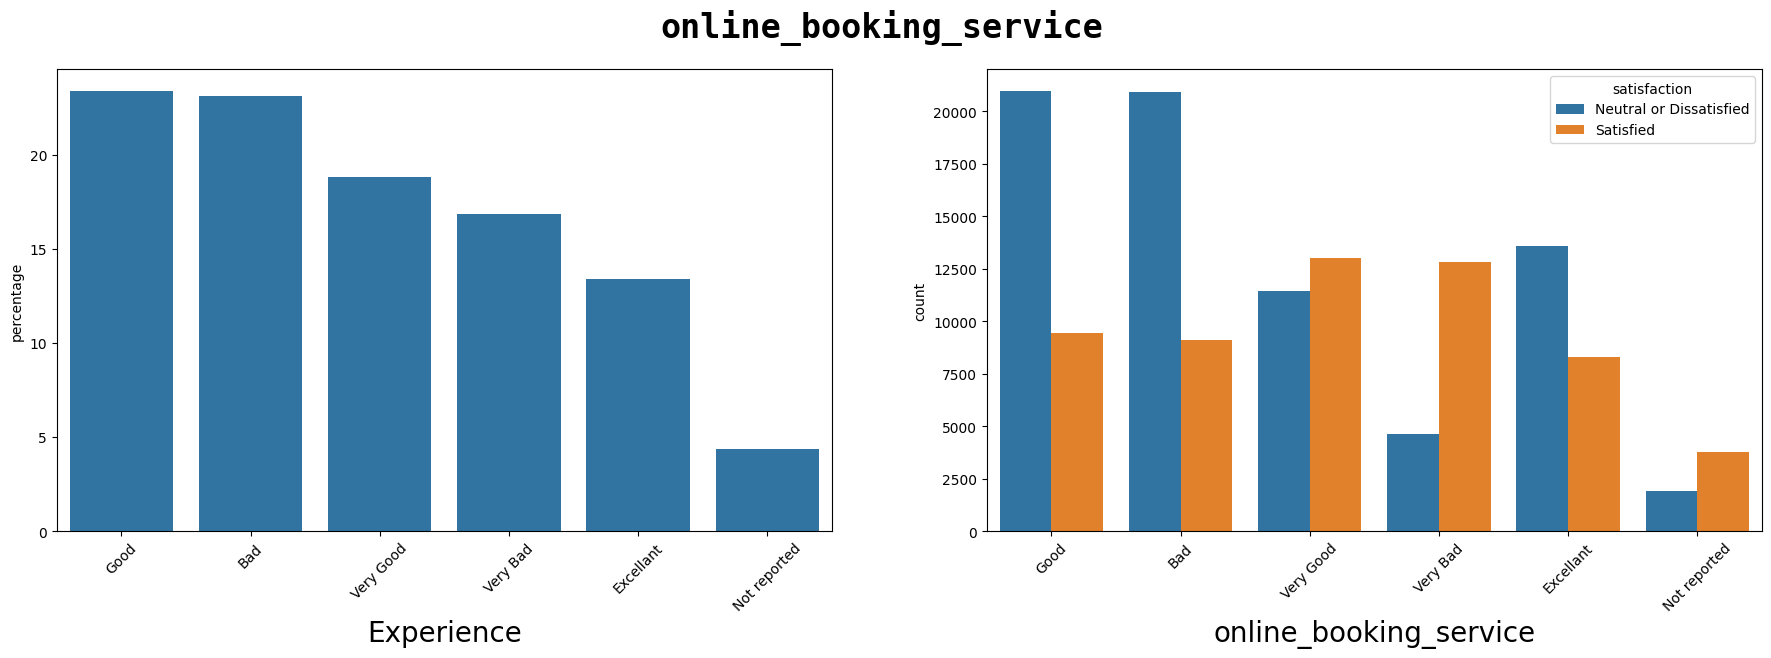

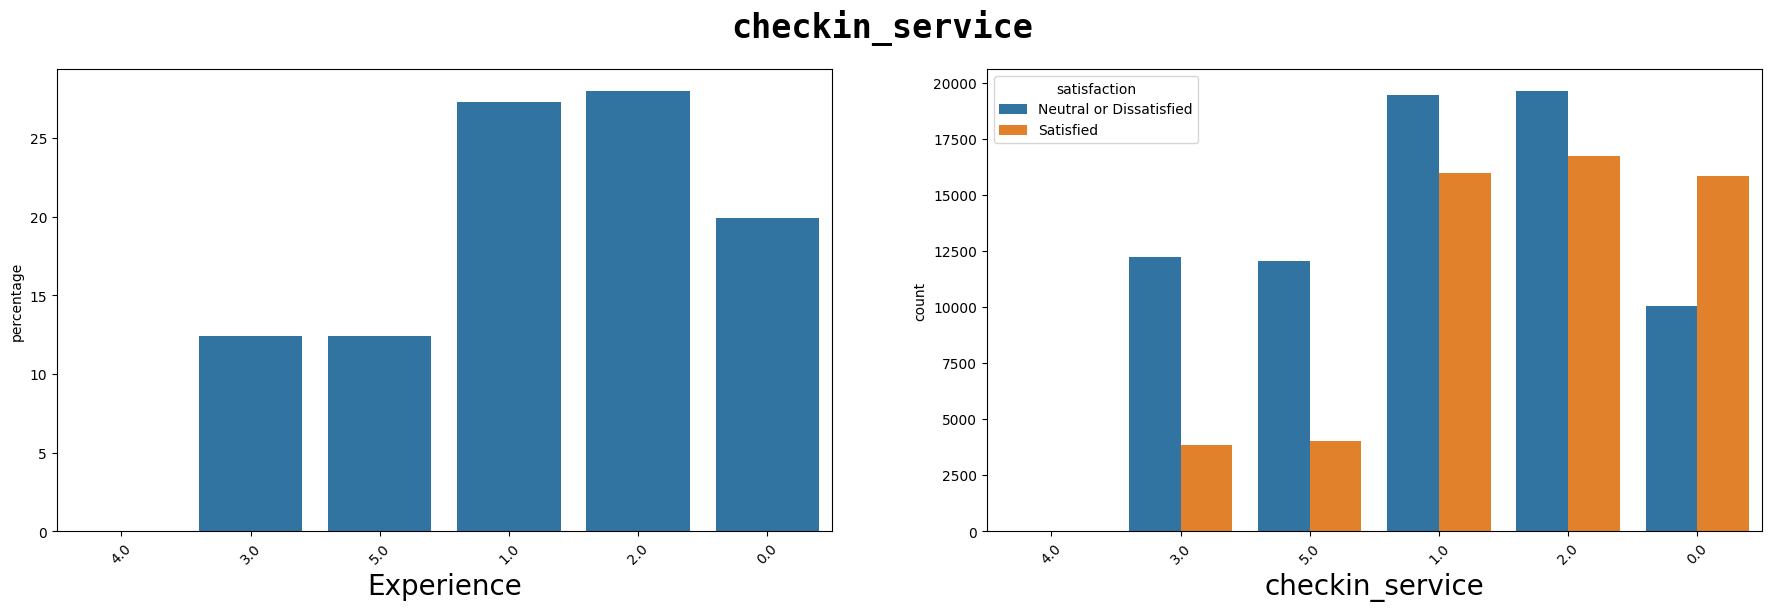

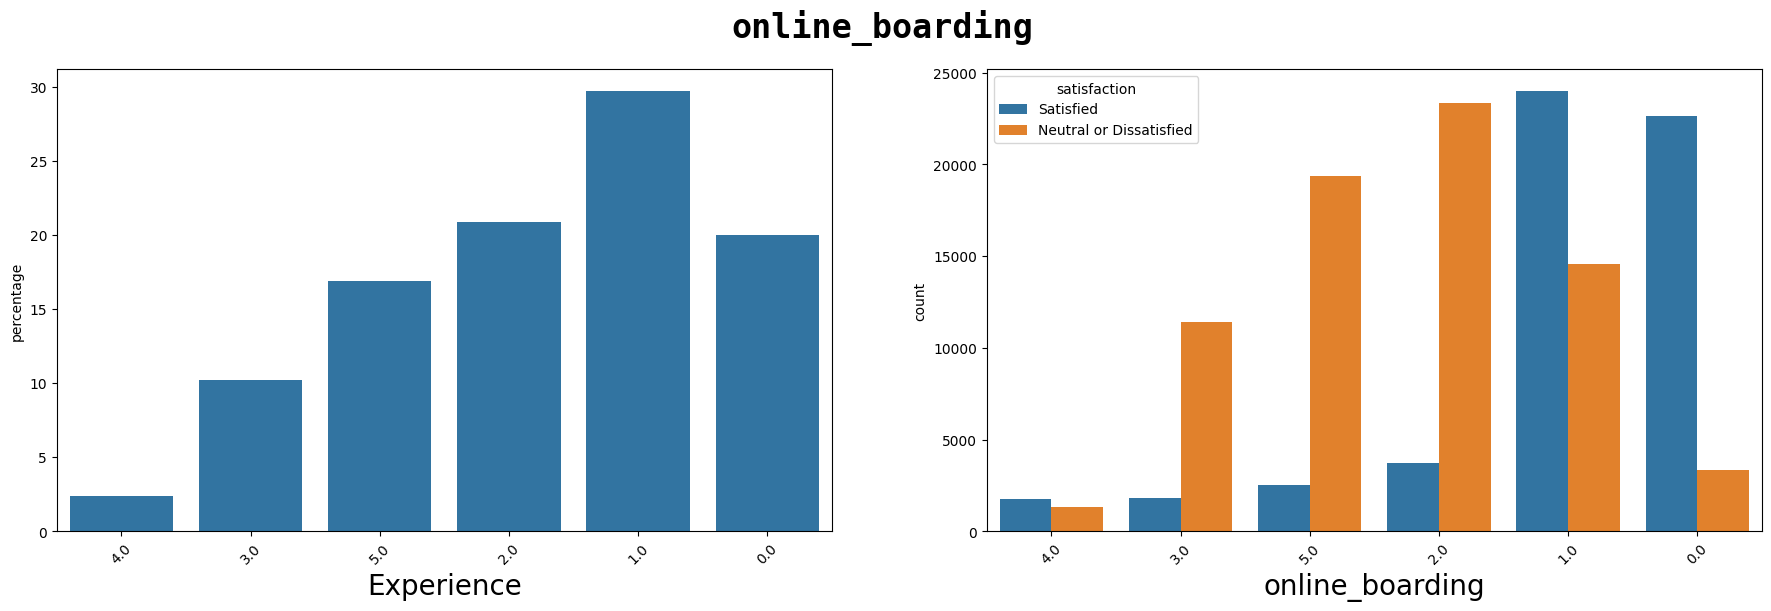

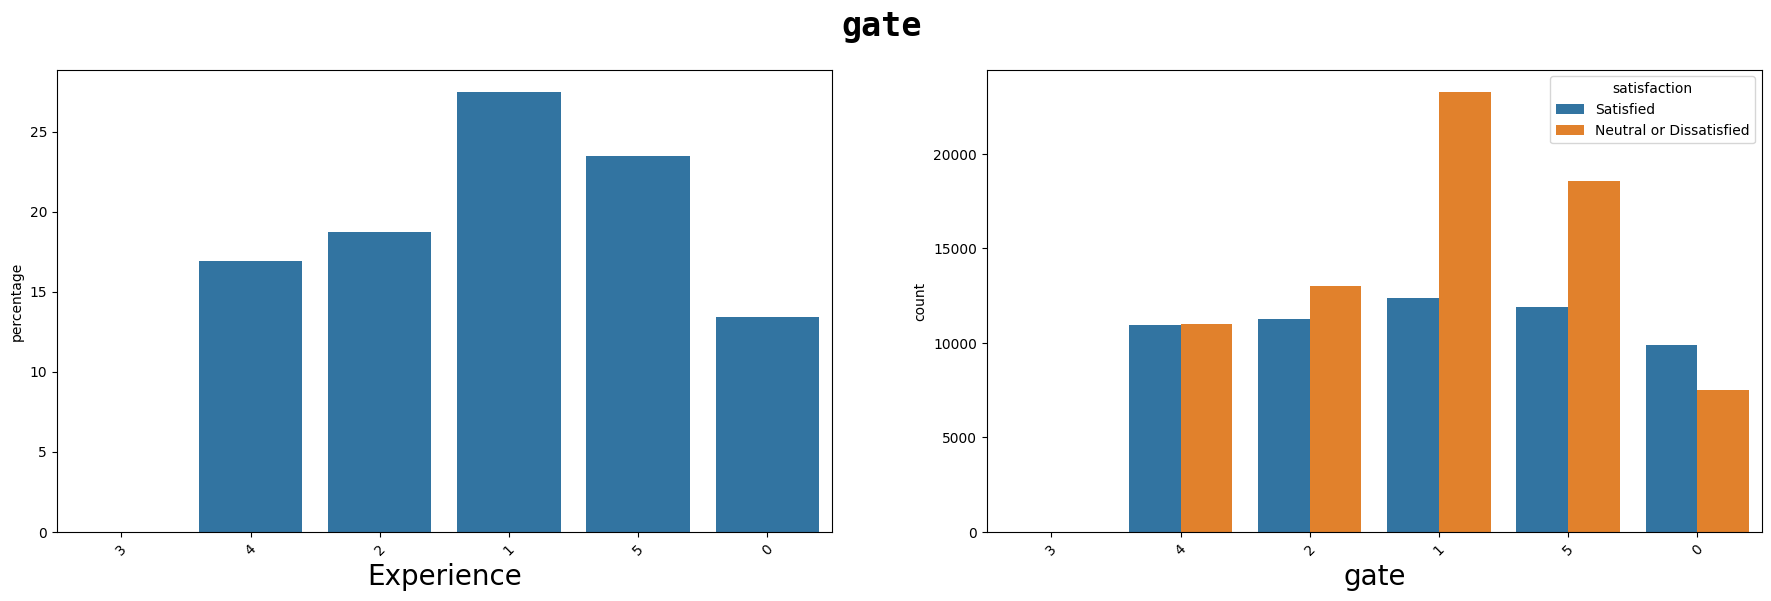

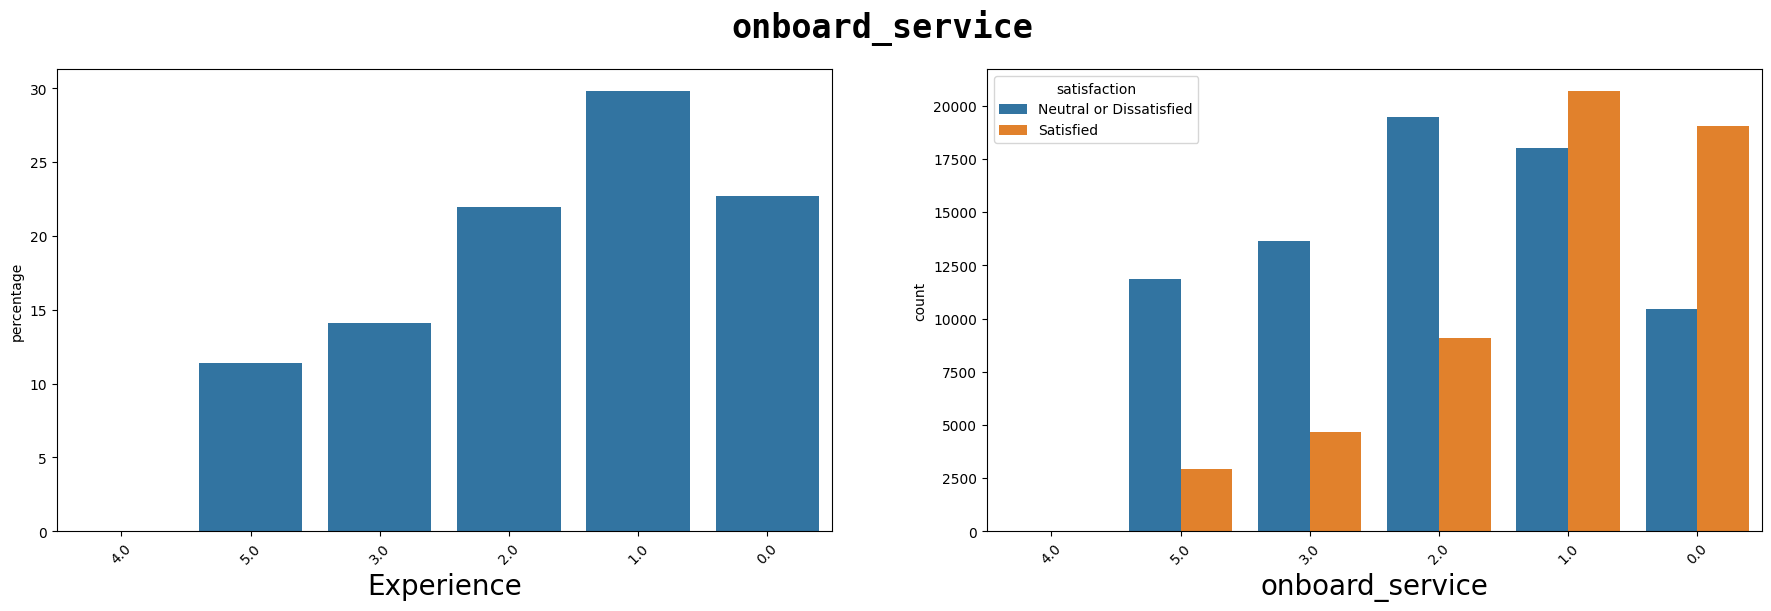

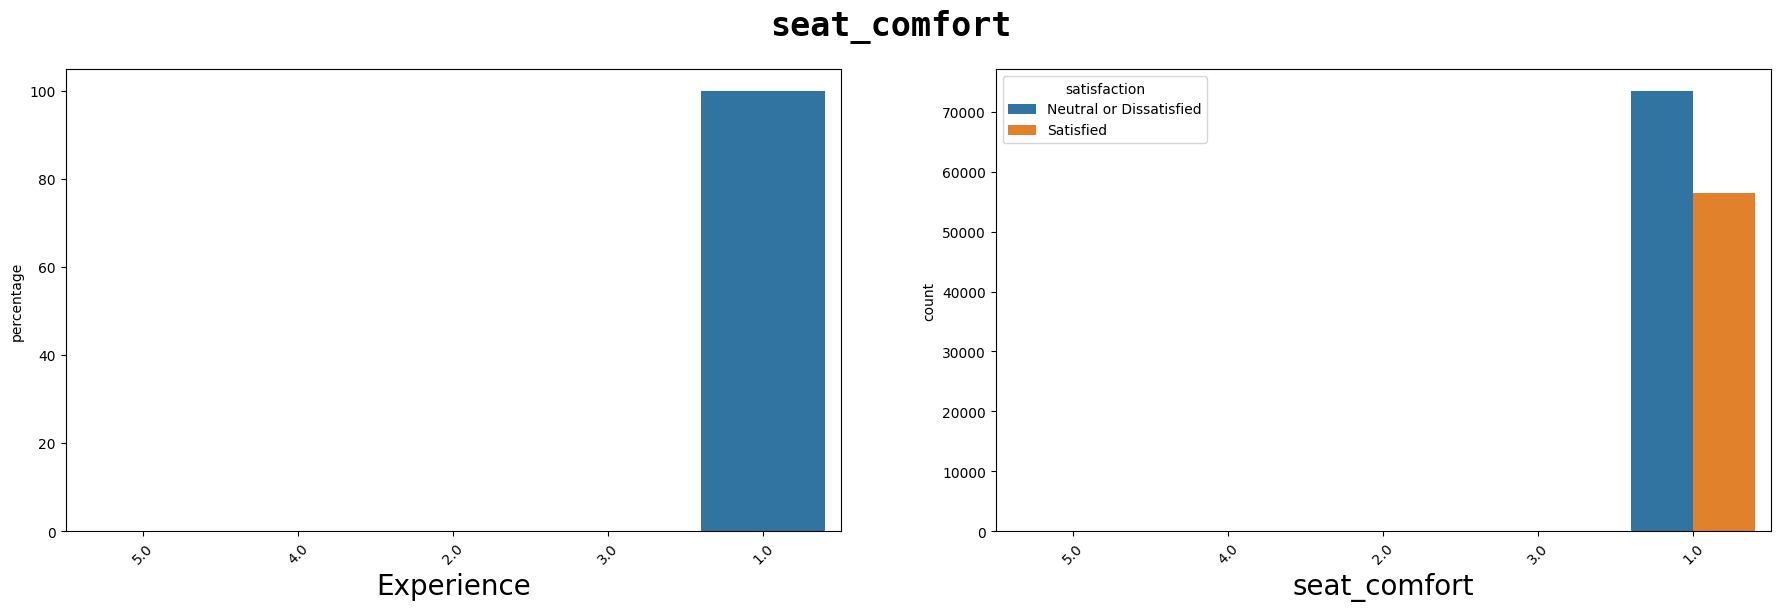

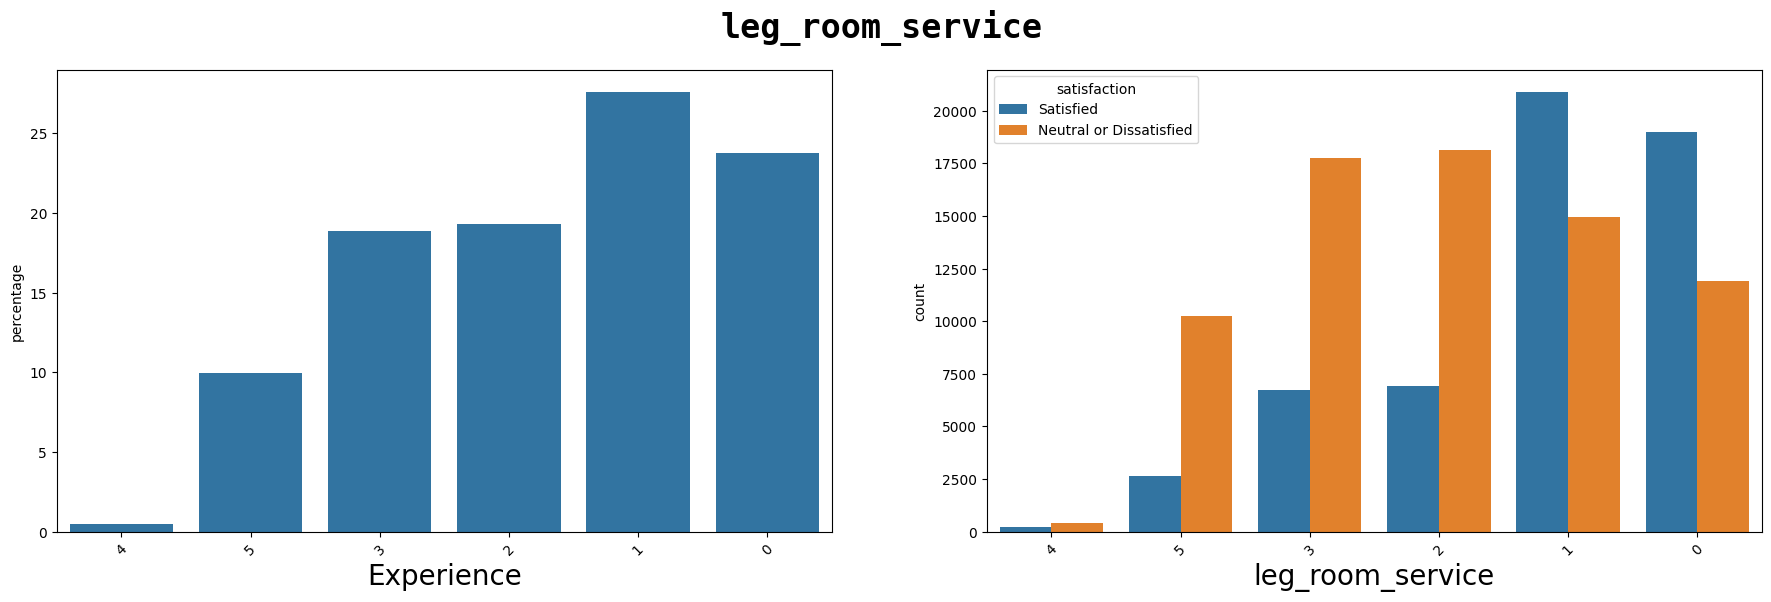

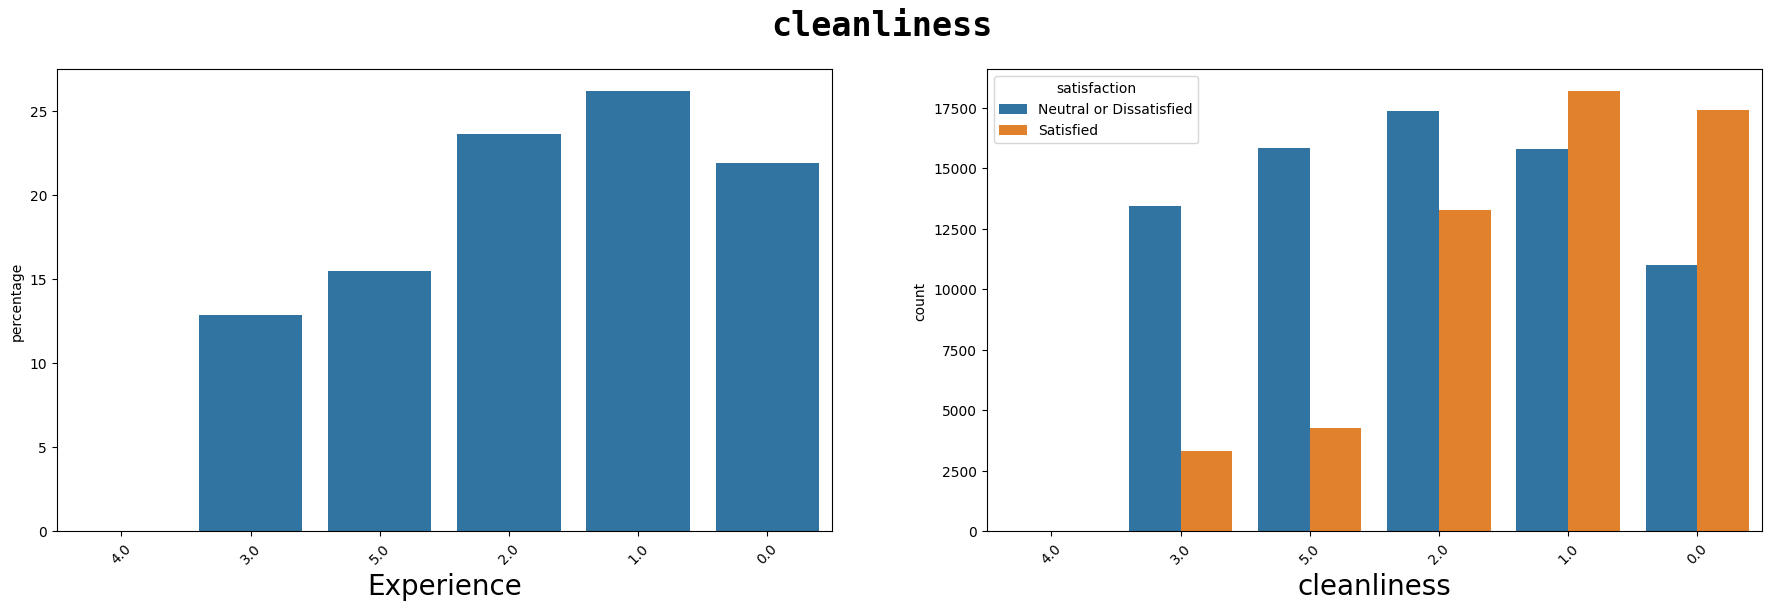

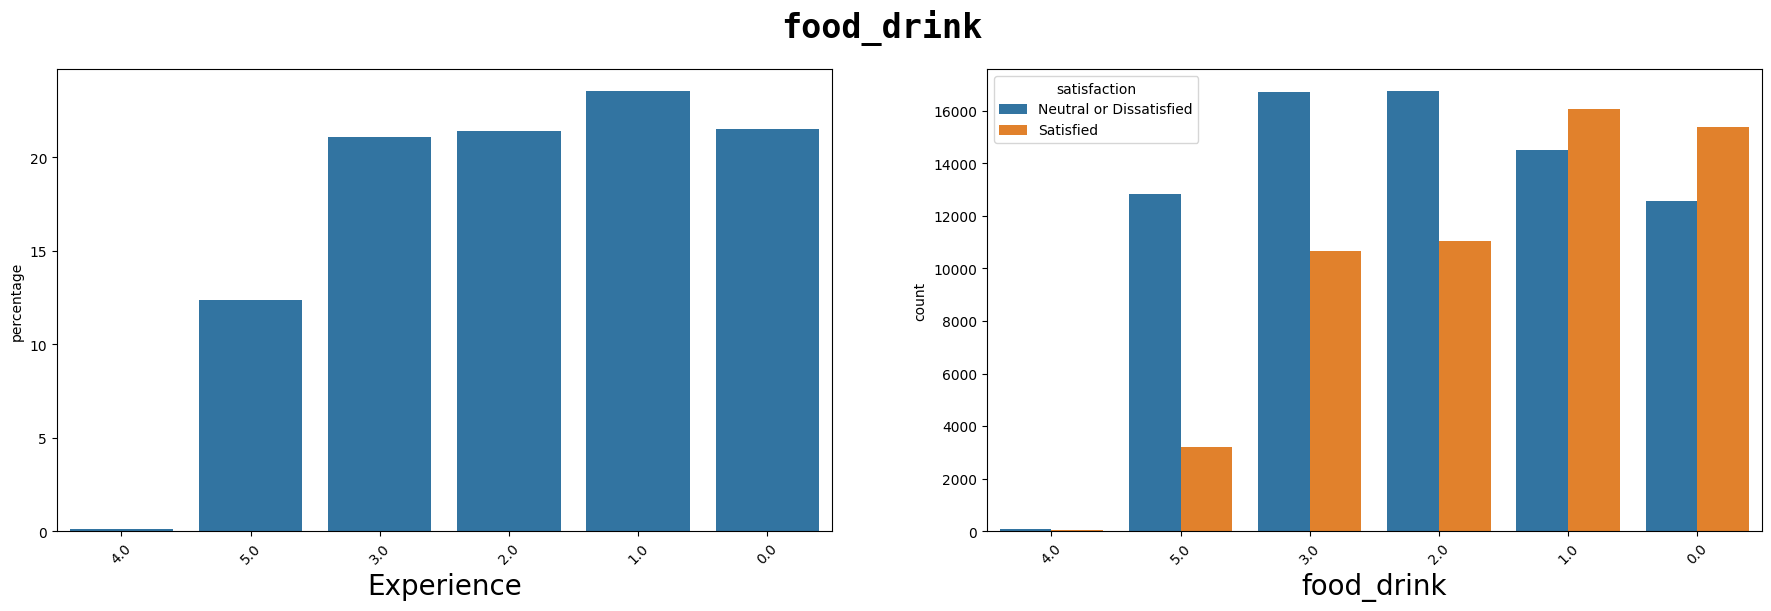

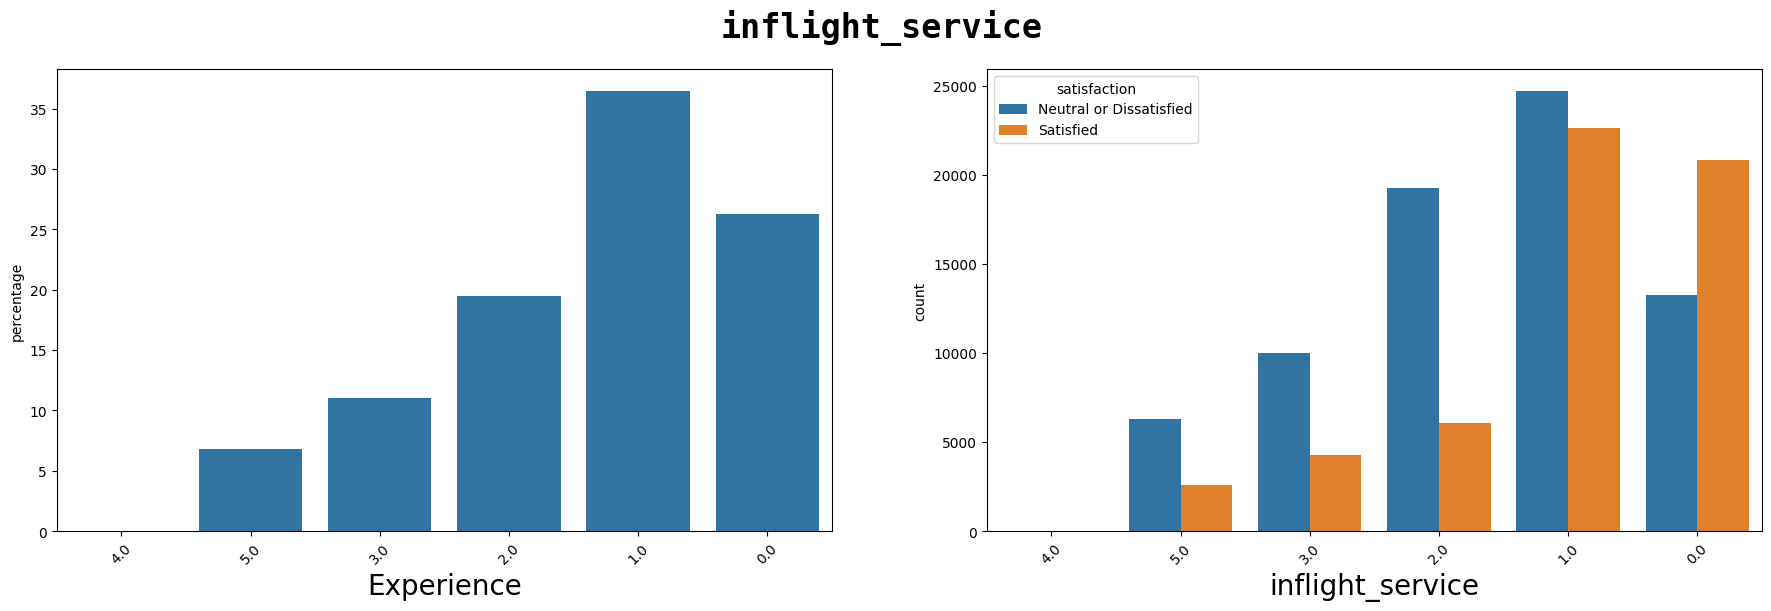

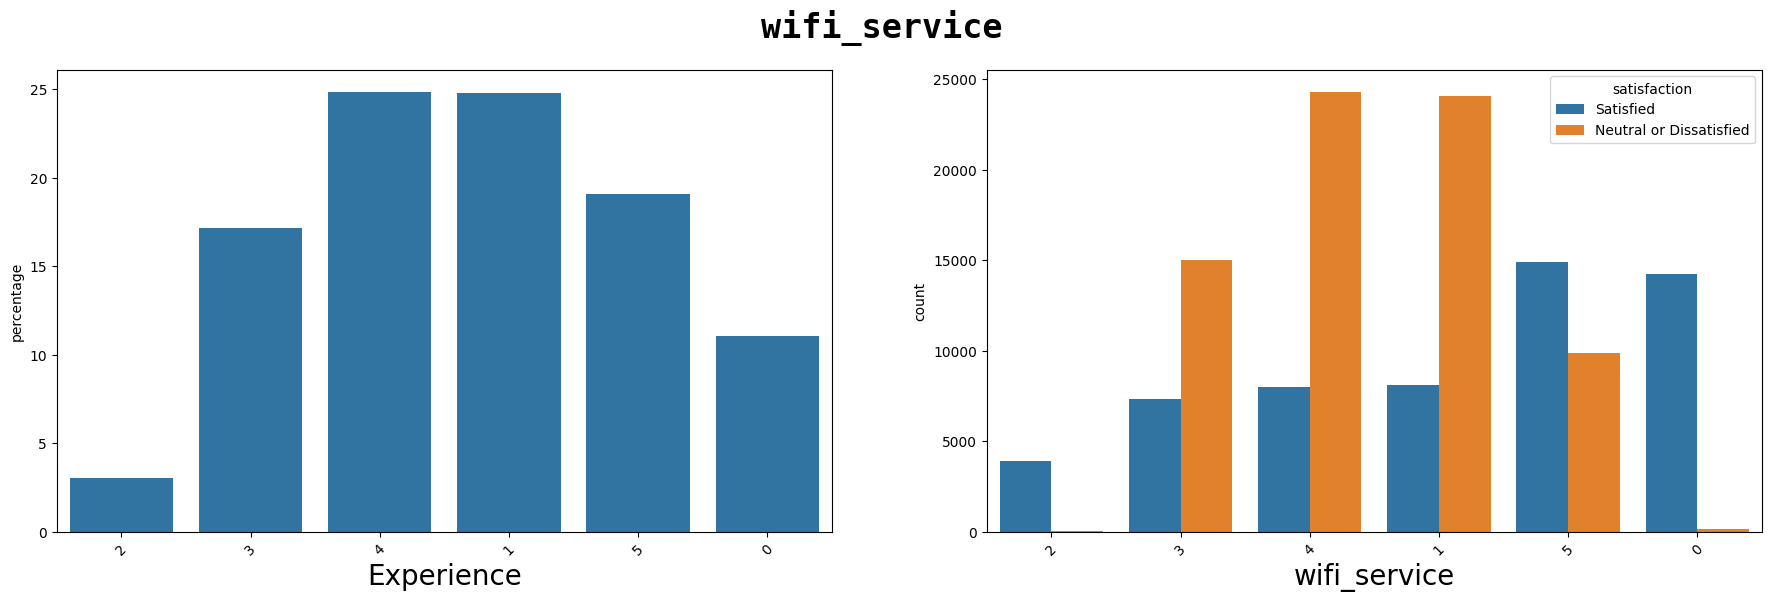

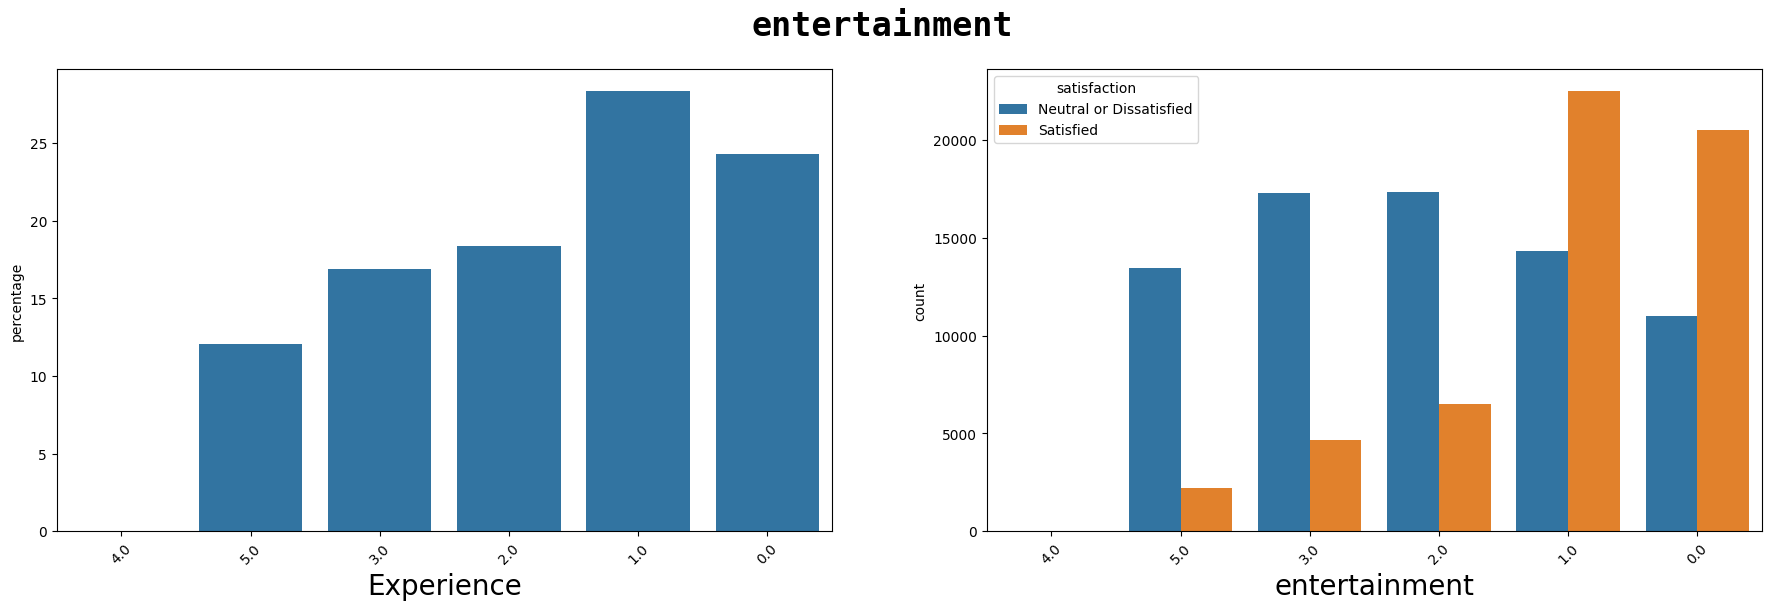

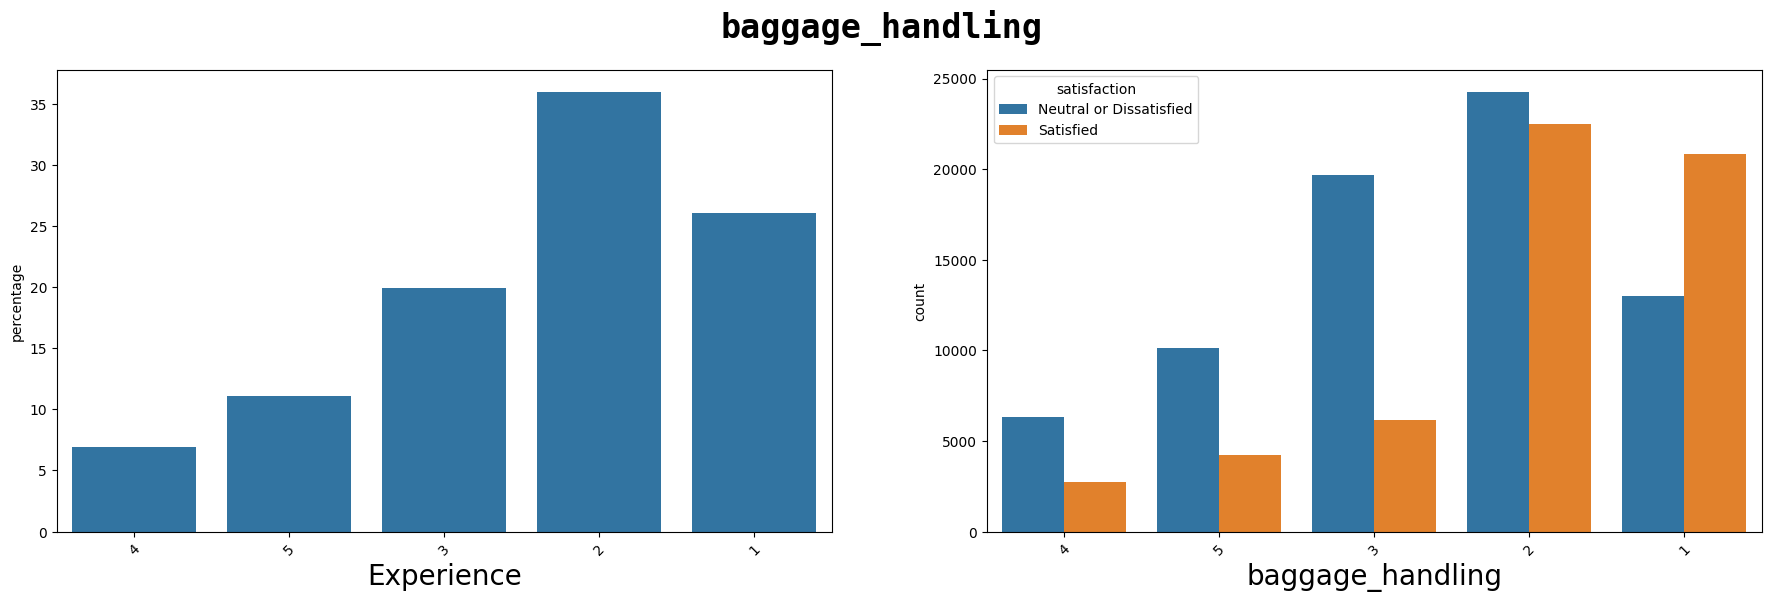

In [45]:
for attribute in['dep_val_time_convenient', 'online_booking_service', 'checkin_service',
       'online_boarding', 'gate', 'onboard_service', 'seat_comfort',
       'leg_room_service', 'cleanliness', 'food_drink', 'inflight_service',
       'wifi_service', 'entertainment', 'baggage_handling']:
    Visualization(passengers_cleaned_analysis, attribute)

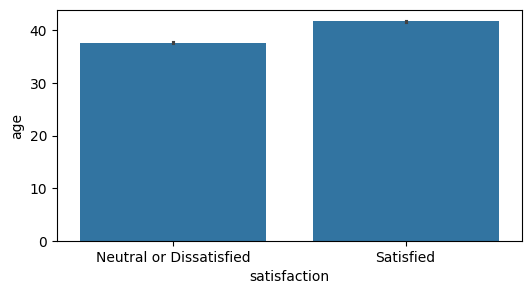

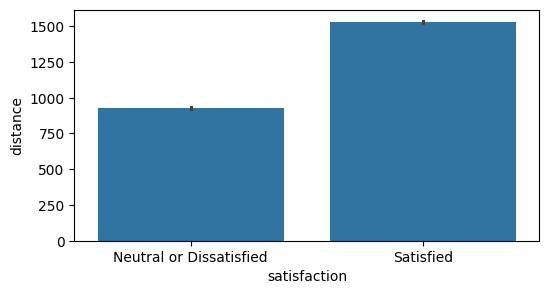

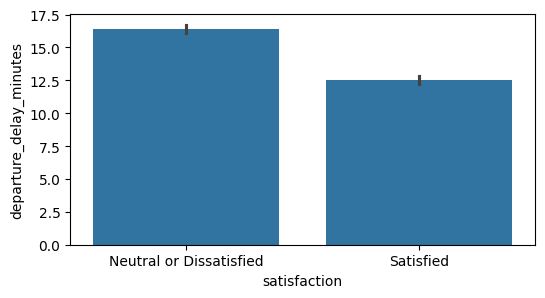

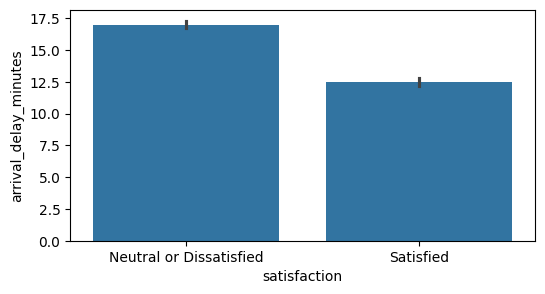

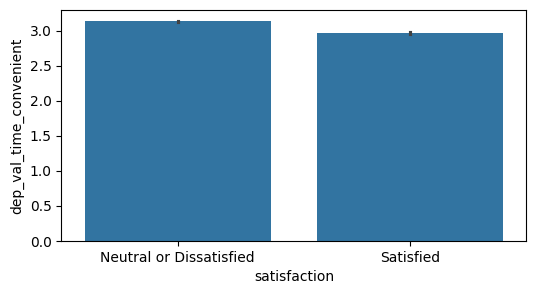

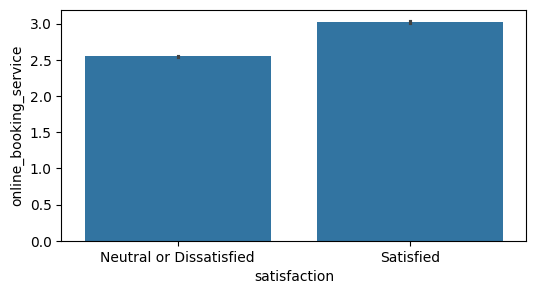

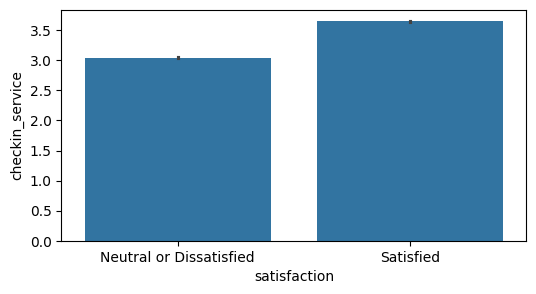

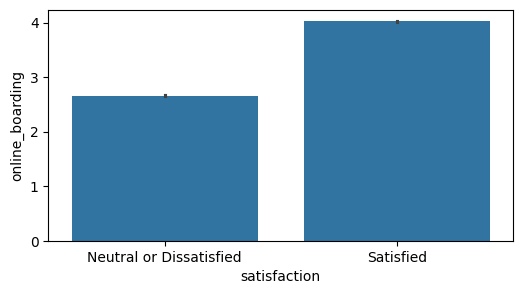

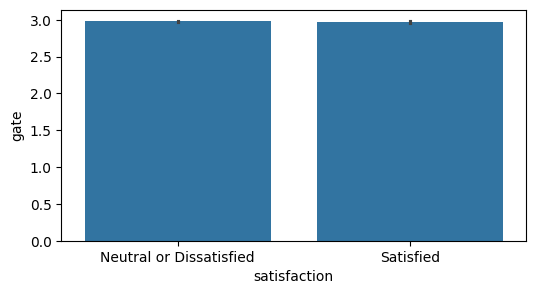

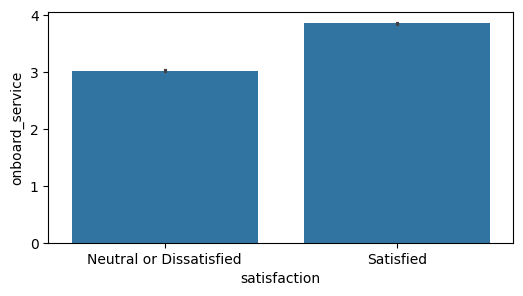

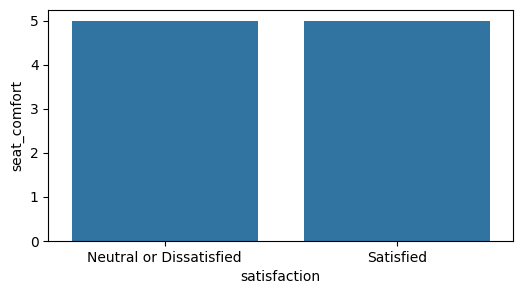

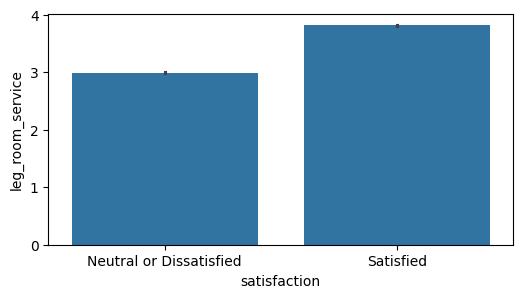

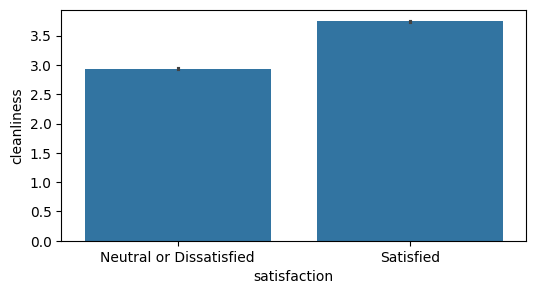

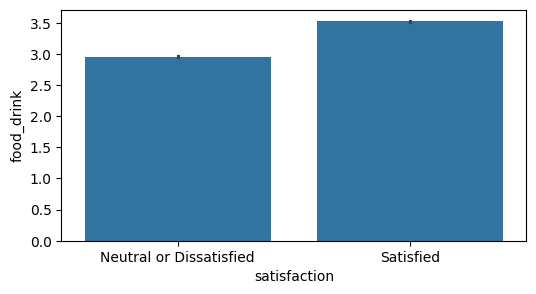

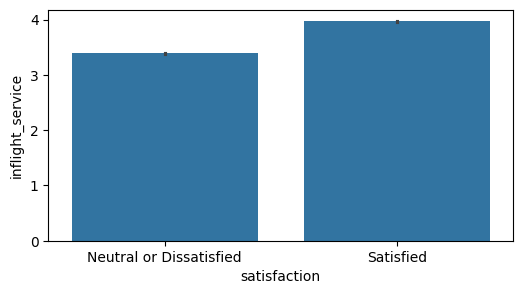

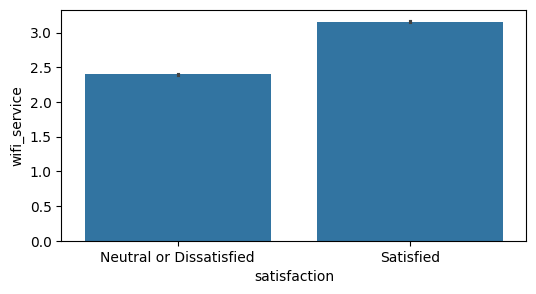

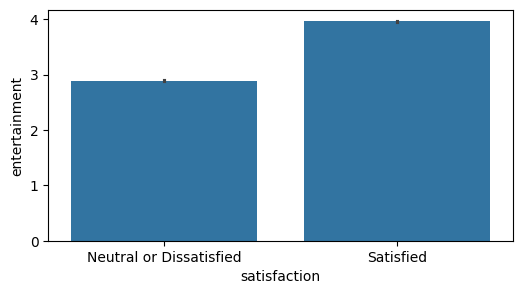

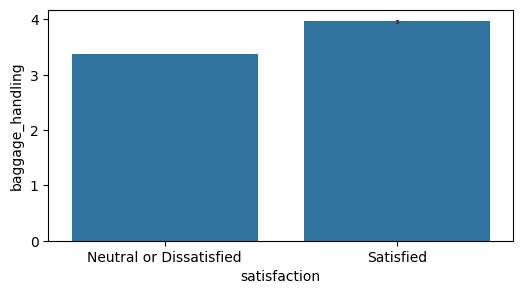

In [46]:
for col in num_features:
    plt.figure(figsize=(6, 3))
    sns.barplot(data=passengers_cleaned, x='satisfaction', y=col)
    plt.show()

From the results of the plot above, it can be seen that age and gate location do not significantly affect flight satisfaction. Gender and corresponding arrival/departure times also do not provide as much information as in the previous plot. Therefore, these features will be removed.

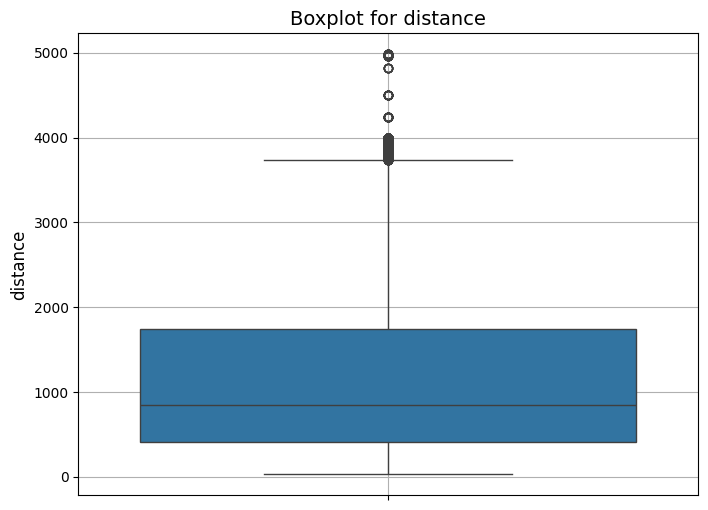

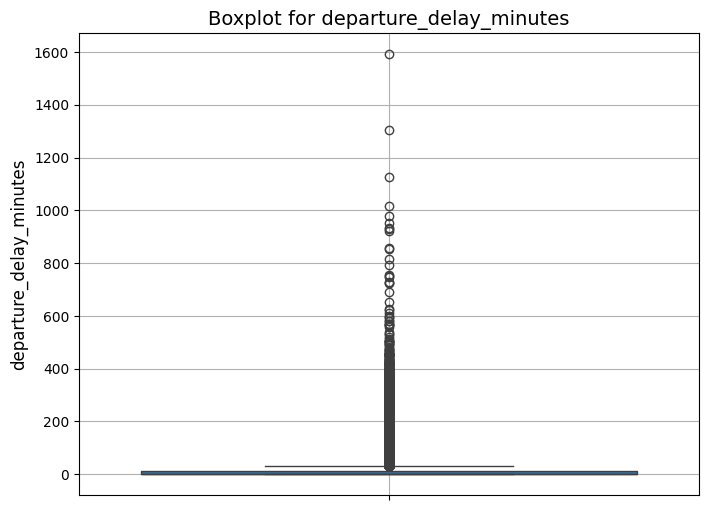

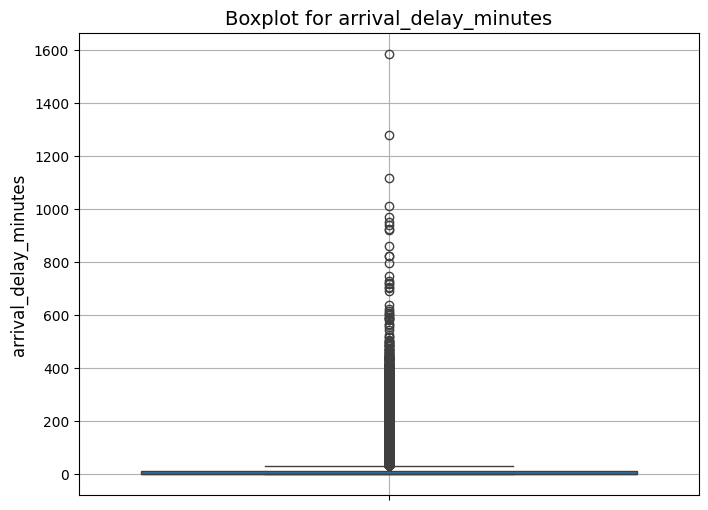

In [47]:
# List of numerical columns to check for outliers
features = ['distance', 'departure_delay_minutes', 'arrival_delay_minutes']

# Loop through each selected column to plot a boxplot
for feature in features:
    plt.figure(figsize=(8, 6))  # Increase size for better readability
    sns.boxplot(data=passengers_cleaned, y=feature)  # Plot boxplot
    plt.title(f'Boxplot for {feature}', fontsize=14)  # Title with font size
    plt.ylabel(feature, fontsize=12)  # Label for y-axis
    plt.xlabel('')  # Clear x-axis label as it's not needed
    plt.grid(True)  # Add grid for better visualization
    plt.show()  # Display the plot


From the outlier detection results above, it can be seen:

There are quite a lot of outliers in the 3 columns, namely distance, arrival delay, and departure delay
We maintain these outliers because if they are deleted or filled in they do not represent the actual data

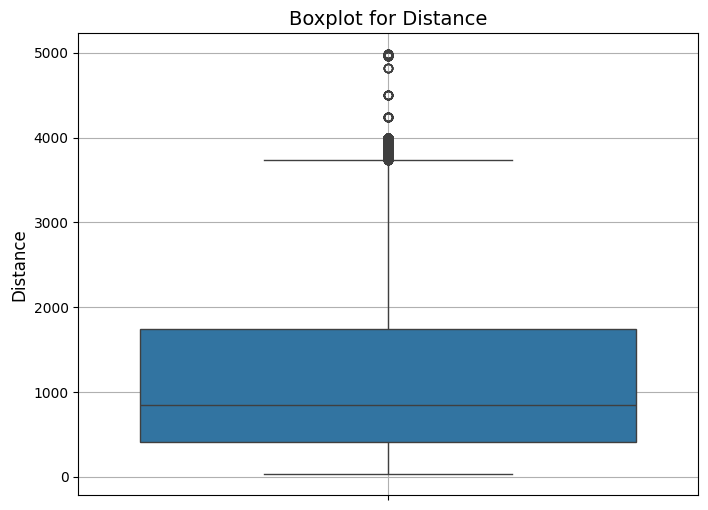

In [48]:
# Boxplot for distance
plt.figure(figsize=(8, 6))  # Set figure size
sns.boxplot(data=passengers_cleaned, y='distance')  # Create boxplot
plt.title('Boxplot for Distance', fontsize=14)  # Add a title
plt.ylabel('Distance', fontsize=12)  # Label the y-axis
plt.grid(True)  # Add grid for better readability
plt.show()  # Display the plot


In [49]:
#function to count the number of outliers
def count_outliers_iqr(data, column, threshold=1.5):
    Q1 = np.percentile(data[column], 25)
    Q3 = np.percentile(data[column], 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    outliers = (data[column] < lower_bound) | (data[column] > upper_bound)
    return outliers.sum()

In [50]:
#list of columns to check
columns = ['distance', 'arrival_delay_minutes', 'departure_delay_minutes']

# Count the number of outliers in each column using the IQR method
outlier_counts = {col: count_outliers_iqr(passengers_cleaned, col) for col in columns}

# Convert to a DataFrame for better readability
outlier_counts_df = pd.DataFrame(list(outlier_counts.items()), columns=['Column', 'Outlier Count'])

outlier_counts_df

,Column,Outlier Count
0,distance,2855
1,arrival_delay_minutes,17490
2,departure_delay_minutes,18096


In [51]:
def percentile_at_first_view(data,col,start,end,jump):
    for i in range(start,end,jump):
        var =data[col].values
        var =np.sort(var,axis=None)
        print('{} percentile value is {}'.format(i,var[int(len(var)*(float(i)/100))]))
    print('100 percentile value is',var[-1])
percentile_at_first_view(passengers_cleaned,'distance',0,100,10)

0 percentile value is 31
10 percentile value is 236
20 percentile value is 358
30 percentile value is 483
40 percentile value is 631
50 percentile value is 844
60 percentile value is 1050
70 percentile value is 1512
80 percentile value is 2072
90 percentile value is 2751
100 percentile value is 4983


In [52]:
percentile_at_first_view(passengers_cleaned,'distance',90,100,1)

90 percentile value is 2751
91 percentile value is 2869
92 percentile value is 2994
93 percentile value is 3125
94 percentile value is 3252
95 percentile value is 3380
96 percentile value is 3505
97 percentile value is 3636
98 percentile value is 3764
99 percentile value is 3884
100 percentile value is 4983


In [53]:
def percentile_at_third_view(data,col):
    for i in np.arange(0.0,1.0,0.1):
        var =data[col].values
        var =np.sort(var,axis=None)
        print('{} percentile value is {}'.format(99+i,var[int(len(var)*(float(99+i)/100))]))
    print('100 percentile value is',var[-1])
percentile_at_third_view(passengers_cleaned,'distance')

99.0 percentile value is 3884
99.1 percentile value is 3895
99.2 percentile value is 3906
99.3 percentile value is 3920
99.4 percentile value is 3932
99.5 percentile value is 3945
99.6 percentile value is 3956
99.7 percentile value is 3970
99.8 percentile value is 3983
99.9 percentile value is 3996
100 percentile value is 4983


In [54]:
#so to remove outliers from this column we can select a flight distance less than 3996
passengers_cleaned[passengers_cleaned['distance']>3996]

,gender,age,customer_type,travel_type,class,distance,departure_delay_minutes,arrival_delay_minutes,dep_val_time_convenient,online_booking_service,...,onboard_service,seat_comfort,leg_room_service,cleanliness,food_drink,inflight_service,wifi_service,entertainment,baggage_handling,satisfaction
59,Female,41,Returning,Business,Business,3997,1.0,0.0,1.0,1.0,...,4.0,5.0,4,4.0,4.0,4.0,1,4.0,5,Satisfied
3330,Male,49,Returning,Business,Business,3997,37.0,77.0,4.0,4.0,...,5.0,5.0,4,5.0,5.0,5.0,4,5.0,5,Satisfied
7087,Male,37,Returning,Business,Business,3997,0.0,0.0,1.0,4.0,...,4.0,5.0,4,3.0,3.0,4.0,1,4.0,4,Satisfied
17346,Male,31,Returning,Business,Business,3997,0.0,0.0,4.0,4.0,...,4.0,5.0,2,3.0,3.0,1.0,4,3.0,1,Satisfied
21053,Female,36,Returning,Business,Business,3998,33.0,24.0,3.0,3.0,...,4.0,5.0,4,1.0,4.0,4.0,3,4.0,5,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109159,Male,46,Returning,Business,Business,4000,33.0,27.0,2.0,2.0,...,4.0,5.0,4,4.0,3.0,4.0,2,4.0,4,Satisfied
115271,Female,32,Returning,Business,Business,3999,2.0,0.0,4.0,4.0,...,5.0,5.0,2,5.0,5.0,4.0,4,5.0,4,Satisfied
122212,Female,38,Returning,Business,Business,3997,0.0,0.0,4.0,4.0,...,4.0,5.0,4,4.0,2.0,4.0,4,4.0,4,Satisfied
125298,Male,46,Returning,Business,Business,4000,0.0,0.0,2.0,2.0,...,1.0,5.0,2,5.0,3.0,1.0,2,1.0,1,Satisfied


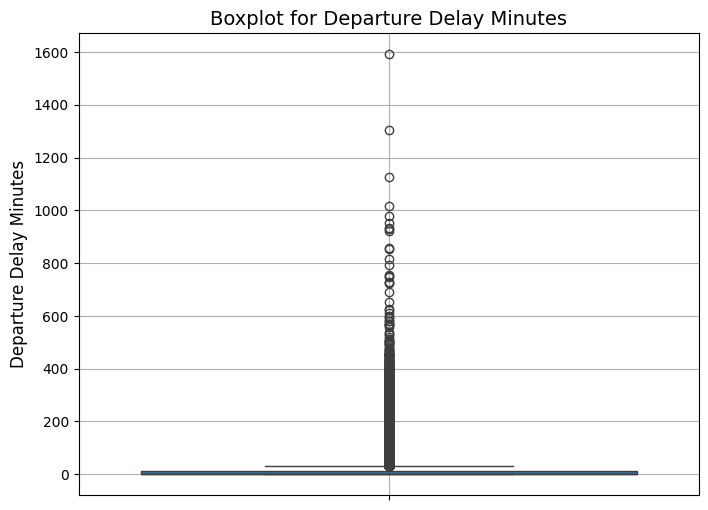

In [55]:
# Boxplot for departure_delay_minutes
plt.figure(figsize=(8, 6))  # Set figure size
sns.boxplot(data=passengers_cleaned, y='departure_delay_minutes')  # Create boxplot
plt.title('Boxplot for Departure Delay Minutes', fontsize=14)  # Add a title
plt.ylabel('Departure Delay Minutes', fontsize=12)  # Label the y-axis
plt.grid(True)  # Add grid for better readability
plt.show()  # Display the plot


In [56]:
percentile_at_first_view(passengers_cleaned,'departure_delay_minutes',0,100,10)

0 percentile value is 0.0
10 percentile value is 0.0
20 percentile value is 0.0
30 percentile value is 0.0
40 percentile value is 0.0
50 percentile value is 0.0
60 percentile value is 2.0
70 percentile value is 8.0
80 percentile value is 19.0
90 percentile value is 44.0
100 percentile value is 1592.0


In [57]:
percentile_at_first_view(passengers_cleaned,'departure_delay_minutes',90,100,1)

90 percentile value is 44.0
91 percentile value is 48.0
92 percentile value is 54.0
93 percentile value is 60.0
94 percentile value is 68.0
95 percentile value is 77.0
96 percentile value is 89.0
97 percentile value is 107.0
98 percentile value is 132.0
99 percentile value is 180.0
100 percentile value is 1592.0


In [58]:
percentile_at_third_view(passengers_cleaned,'departure_delay_minutes')

99.0 percentile value is 180.0
99.1 percentile value is 186.0
99.2 percentile value is 194.0
99.3 percentile value is 203.0
99.4 percentile value is 214.0
99.5 percentile value is 232.0
99.6 percentile value is 250.0
99.7 percentile value is 277.0
99.8 percentile value is 315.0
99.9 percentile value is 381.0
100 percentile value is 1592.0


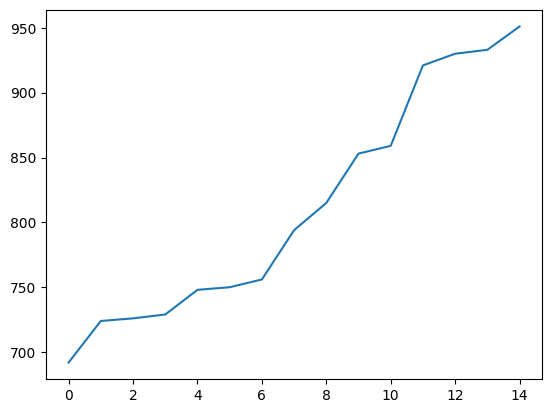

In [59]:
var = passengers_cleaned['departure_delay_minutes'].values
var =np.sort(var,axis=None)
plt.plot(var[-20:-5])
plt.show()

In [60]:
#to remove outliers from depature delay time column we can select flights which have delayed less than 750mins
passengers_cleaned[passengers_cleaned['departure_delay_minutes']>750]

,gender,age,customer_type,travel_type,class,distance,departure_delay_minutes,arrival_delay_minutes,dep_val_time_convenient,online_booking_service,...,onboard_service,seat_comfort,leg_room_service,cleanliness,food_drink,inflight_service,wifi_service,entertainment,baggage_handling,satisfaction
2251,Female,42,Returning,Business,Business,693,815.0,822.0,1.0,1.0,...,5.0,5.0,3,2.0,2.0,4.0,2,2.0,3,Neutral or Dissatisfied
4380,Female,53,Returning,Business,Business,2418,930.0,952.0,4.0,4.0,...,5.0,5.0,2,3.0,3.0,4.0,3,3.0,2,Neutral or Dissatisfied
4907,Male,49,Returning,Business,Business,1959,1017.0,1011.0,1.0,1.0,...,4.0,5.0,4,4.0,4.0,4.0,1,4.0,5,Satisfied
6066,Female,45,Returning,Personal,Economy,630,794.0,795.0,4.0,1.0,...,4.0,5.0,4,5.0,1.0,5.0,1,3.0,5,Neutral or Dissatisfied
8349,Male,47,Returning,Business,Business,2187,933.0,920.0,5.0,4.0,...,4.0,5.0,5,4.0,4.0,4.0,4,5.0,5,Satisfied
63693,Female,39,Returning,Business,Business,1696,951.0,940.0,4.0,4.0,...,1.0,5.0,3,1.0,1.0,1.0,1,2.0,3,Neutral or Dissatisfied
69508,Male,27,Returning,Business,Business,1746,859.0,860.0,1.0,4.0,...,3.0,5.0,5,5.0,4.0,4.0,1,4.0,4,Satisfied
69665,Male,32,Returning,Business,Business,2916,1305.0,1280.0,2.0,2.0,...,4.0,5.0,5,5.0,5.0,3.0,2,3.0,4,Satisfied
73475,Female,47,Returning,Personal,Economy,1120,1592.0,1584.0,2.0,2.0,...,4.0,5.0,4,2.0,2.0,3.0,2,2.0,4,Neutral or Dissatisfied
73486,Male,8,Returning,Personal,Economy,1144,1128.0,1115.0,5.0,2.0,...,4.0,5.0,3,1.0,2.0,3.0,2,4.0,5,Neutral or Dissatisfied


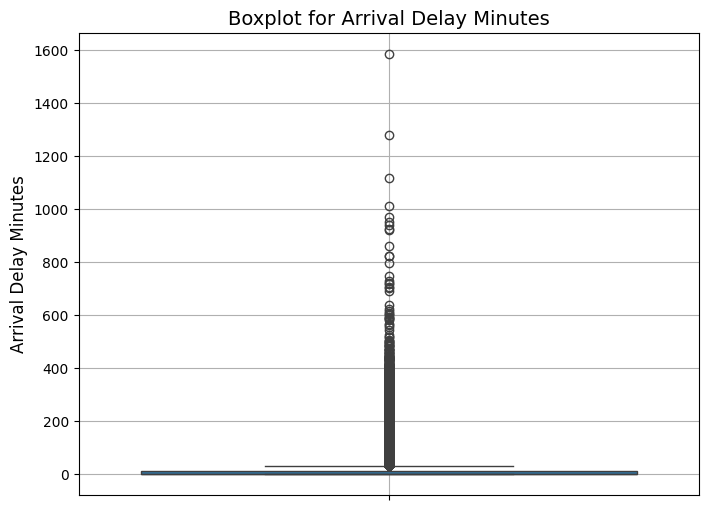

In [61]:
# Boxplot for departure_delay_minutes
plt.figure(figsize=(8, 6))  # Set figure size
sns.boxplot(data=passengers_cleaned, y='arrival_delay_minutes')  # Create boxplot
plt.title('Boxplot for Arrival Delay Minutes', fontsize=14)  # Add a title
plt.ylabel('Arrival Delay Minutes', fontsize=12)  # Label the y-axis
plt.grid(True)  # Add grid for better readability
plt.show()  # Display the plot

In [62]:
percentile_at_first_view(passengers_cleaned,'arrival_delay_minutes',0,100,10)

0 percentile value is 0.0
10 percentile value is 0.0
20 percentile value is 0.0
30 percentile value is 0.0
40 percentile value is 0.0
50 percentile value is 0.0
60 percentile value is 2.0
70 percentile value is 8.0
80 percentile value is 19.0
90 percentile value is 44.0
100 percentile value is 1584.0


In [63]:
percentile_at_first_view(passengers_cleaned,'arrival_delay_minutes',90,100,1)

90 percentile value is 44.0
91 percentile value is 49.0
92 percentile value is 54.0
93 percentile value is 60.0
94 percentile value is 68.0
95 percentile value is 78.0
96 percentile value is 91.0
97 percentile value is 108.0
98 percentile value is 134.0
99 percentile value is 182.0
100 percentile value is 1584.0


In [64]:
percentile_at_third_view(passengers_cleaned,'arrival_delay_minutes')

99.0 percentile value is 182.0
99.1 percentile value is 187.0
99.2 percentile value is 196.0
99.3 percentile value is 207.0
99.4 percentile value is 219.0
99.5 percentile value is 236.0
99.6 percentile value is 255.0
99.7 percentile value is 280.0
99.8 percentile value is 317.0
99.9 percentile value is 383.0
100 percentile value is 1584.0


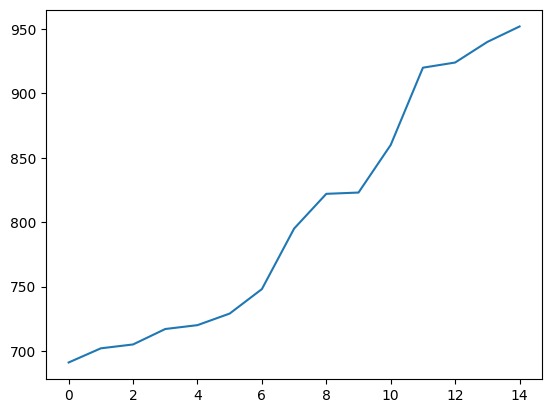

In [65]:
var = passengers_cleaned['arrival_delay_minutes'].values
var =np.sort(var,axis=None)
plt.plot(var[-20:-5])
plt.show()

In [66]:
# we can select flights which have delayed to arrive less than 645mins
passengers_cleaned[passengers_cleaned['arrival_delay_minutes']>645]

,gender,age,customer_type,travel_type,class,distance,departure_delay_minutes,arrival_delay_minutes,dep_val_time_convenient,online_booking_service,...,onboard_service,seat_comfort,leg_room_service,cleanliness,food_drink,inflight_service,wifi_service,entertainment,baggage_handling,satisfaction
2251,Female,42,Returning,Business,Business,693,815.0,822.0,1.0,1.0,...,5.0,5.0,3,2.0,2.0,4.0,2,2.0,3,Neutral or Dissatisfied
4380,Female,53,Returning,Business,Business,2418,930.0,952.0,4.0,4.0,...,5.0,5.0,2,3.0,3.0,4.0,3,3.0,2,Neutral or Dissatisfied
4907,Male,49,Returning,Business,Business,1959,1017.0,1011.0,1.0,1.0,...,4.0,5.0,4,4.0,4.0,4.0,1,4.0,5,Satisfied
5177,Female,42,Returning,Personal,Business,351,692.0,702.0,3.0,2.0,...,3.0,5.0,3,3.0,2.0,3.0,2,1.0,2,Neutral or Dissatisfied
5706,Female,7,Returning,Personal,Economy,234,724.0,705.0,5.0,0.0,...,4.0,5.0,5,4.0,0.0,2.0,1,4.0,1,Neutral or Dissatisfied
6066,Female,45,Returning,Personal,Economy,630,794.0,795.0,4.0,1.0,...,4.0,5.0,4,5.0,1.0,5.0,1,3.0,5,Neutral or Dissatisfied
8349,Male,47,Returning,Business,Business,2187,933.0,920.0,5.0,4.0,...,4.0,5.0,5,4.0,4.0,4.0,4,5.0,5,Satisfied
63693,Female,39,Returning,Business,Business,1696,951.0,940.0,4.0,4.0,...,1.0,5.0,3,1.0,1.0,1.0,1,2.0,3,Neutral or Dissatisfied
64169,Male,33,Returning,Personal,Economy,989,726.0,691.0,5.0,0.0,...,2.0,5.0,5,1.0,0.0,4.0,1,4.0,5,Neutral or Dissatisfied
69508,Male,27,Returning,Business,Business,1746,859.0,860.0,1.0,4.0,...,3.0,5.0,5,5.0,4.0,4.0,1,4.0,4,Satisfied


In [67]:
def removal_outlier(data):
    #rows in shape
    a=passengers_cleaned.shape[0]
    print('{} are the number of rows we have in our original dataframe'.format(a))
    new_passengers=data[(data['distance']<3996) & (data['departure_delay_minutes']<750) & (data['arrival_delay_minutes']<645)]
    #store rows of filtered dataframe
    b=new_passengers.shape[0]
    #print number of outliers
    print('Number of Outliers:',(a-b))
    print('Percentage of data removed:',100-(b/a)*100)
    return new_passengers

new_passengers=removal_outlier(passengers_cleaned)

129856 are the number of rows we have in our original dataframe
Number of Outliers: 150
Percentage of data removed: 0.11551256776736807


In [68]:
new_passengers.shape

(129706, 23)

In [69]:
print(new_passengers['satisfaction'].unique())

['Neutral or Dissatisfied' 'Satisfied']


In [70]:
# Create the mapping dictionary
target_dict = {
    'Neutral or Dissatisfied': 0,
    'Satisfied': 1
}

# Map the cleaned satisfaction values using the dictionary
new_passengers['satisfaction'] = new_passengers['satisfaction'].map(target_dict)

# Convert the Series to integer type
new_passengers['satisfaction'] = new_passengers['satisfaction'].astype(int)

In [71]:
new_passengers.head()

,gender,age,customer_type,travel_type,class,distance,departure_delay_minutes,arrival_delay_minutes,dep_val_time_convenient,online_booking_service,...,onboard_service,seat_comfort,leg_room_service,cleanliness,food_drink,inflight_service,wifi_service,entertainment,baggage_handling,satisfaction
0,Male,48,First-time,Business,Business,821,2.0,5.0,3.0,3.0,...,3.0,5.0,2,5.0,5.0,5.0,3,5.0,5,0
1,Female,35,Returning,Business,Business,821,26.0,39.0,2.0,2.0,...,5.0,4.0,5,5.0,3.0,5.0,2,5.0,5,1
2,Male,41,Returning,Business,Business,853,0.0,0.0,4.0,4.0,...,3.0,5.0,3,5.0,5.0,3.0,4,3.0,3,1
3,Male,50,Returning,Business,Business,1905,0.0,0.0,2.0,2.0,...,5.0,5.0,5,4.0,4.0,5.0,2,5.0,5,1
4,Female,49,Returning,Business,Business,3470,0.0,1.0,3.0,3.0,...,3.0,4.0,4,5.0,4.0,3.0,3,3.0,3,1


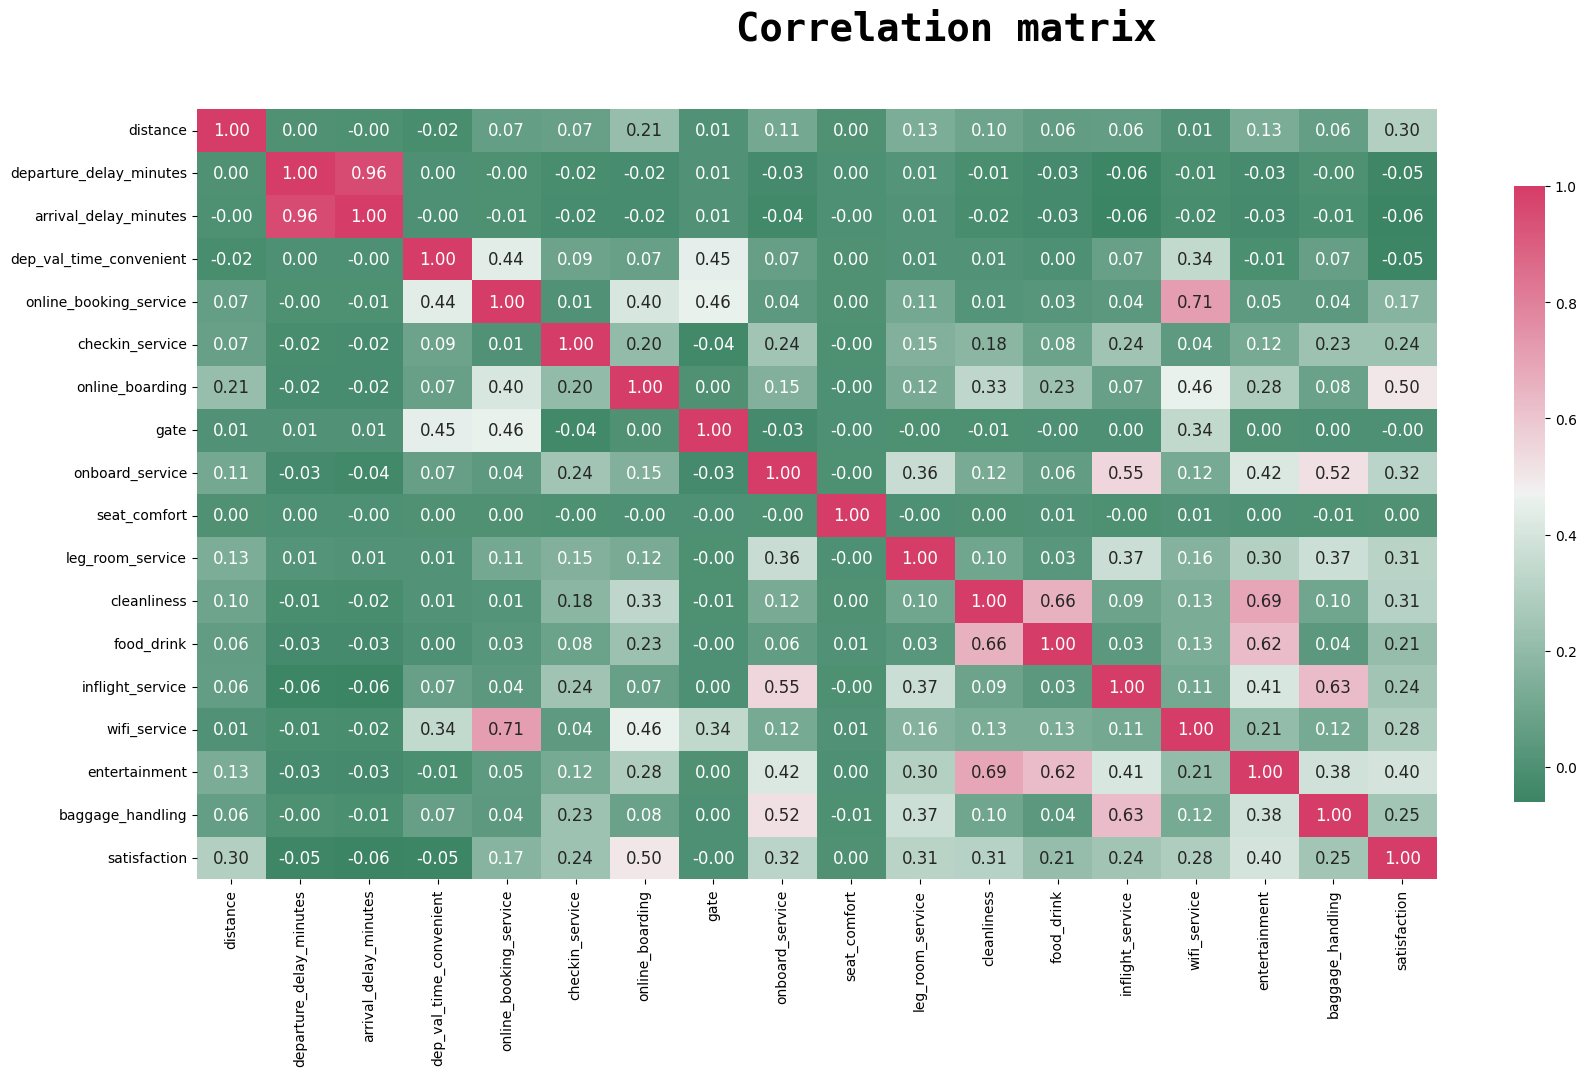

In [72]:
fig=plt.subplots(figsize=(20,10))
plt.suptitle('Correlation matrix',fontsize=28, fontname='monospace',weight='bold')
cmap=sns.diverging_palette(150,1,as_cmap=True)

sns.heatmap(new_passengers[['distance',
       'departure_delay_minutes', 'arrival_delay_minutes',
       'dep_val_time_convenient', 'online_booking_service', 'checkin_service',
       'online_boarding', 'gate', 'onboard_service', 'seat_comfort',
       'leg_room_service', 'cleanliness', 'food_drink', 'inflight_service',
       'wifi_service', 'entertainment', 'baggage_handling', 'satisfaction']].corr(),annot=True,cmap=cmap, fmt=".2f", annot_kws={"size": 12}, cbar_kws={"shrink": .8})
plt.show()

In [73]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [74]:
label={}
for col in new_passengers.select_dtypes(include=['object']).columns:
    label[col]=LabelEncoder()
    new_passengers[col]=label[col].fit_transform(new_passengers[col])

In [75]:
new_passengers.head(25)

,gender,age,customer_type,travel_type,class,distance,departure_delay_minutes,arrival_delay_minutes,dep_val_time_convenient,online_booking_service,...,onboard_service,seat_comfort,leg_room_service,cleanliness,food_drink,inflight_service,wifi_service,entertainment,baggage_handling,satisfaction
0,1,48,0,0,0,821,2.0,5.0,3.0,3.0,...,3.0,5.0,2,5.0,5.0,5.0,3,5.0,5,0
1,0,35,1,0,0,821,26.0,39.0,2.0,2.0,...,5.0,4.0,5,5.0,3.0,5.0,2,5.0,5,1
2,1,41,1,0,0,853,0.0,0.0,4.0,4.0,...,3.0,5.0,3,5.0,5.0,3.0,4,3.0,3,1
3,1,50,1,0,0,1905,0.0,0.0,2.0,2.0,...,5.0,5.0,5,4.0,4.0,5.0,2,5.0,5,1
4,0,49,1,0,0,3470,0.0,1.0,3.0,3.0,...,3.0,4.0,4,5.0,4.0,3.0,3,3.0,3,1
5,1,43,1,0,0,3788,0.0,0.0,4.0,4.0,...,4.0,4.0,4,3.0,3.0,4.0,4,4.0,4,1
7,0,60,1,0,0,853,0.0,3.0,3.0,4.0,...,3.0,4.0,4,4.0,4.0,3.0,4,3.0,3,1
9,0,38,1,0,0,2822,13.0,0.0,2.0,5.0,...,5.0,4.0,5,4.0,2.0,5.0,2,5.0,5,1
10,0,28,0,0,0,821,0.0,5.0,1.0,1.0,...,2.0,2.0,5,2.0,2.0,4.0,1,2.0,3,0
11,0,27,0,0,0,421,20.0,21.0,2.0,2.0,...,2.0,2.0,5,1.0,1.0,3.0,1,1.0,4,0


In [76]:
new_passengers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129706 entries, 0 to 129891
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   gender                   129706 non-null  int64  
 1   age                      129706 non-null  int64  
 2   customer_type            129706 non-null  int64  
 3   travel_type              129706 non-null  int64  
 4   class                    129706 non-null  int64  
 5   distance                 129706 non-null  int64  
 6   departure_delay_minutes  129706 non-null  float64
 7   arrival_delay_minutes    129706 non-null  float64
 8   dep_val_time_convenient  129706 non-null  float64
 9   online_booking_service   129706 non-null  float64
 10  checkin_service          129706 non-null  float64
 11  online_boarding          129706 non-null  float64
 12  gate                     129706 non-null  int64  
 13  onboard_service          129706 non-null  float64
 14  seat_comf

In [77]:
X=new_passengers.drop(columns=['satisfaction'])
y=new_passengers['satisfaction']

X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.3,random_state=42)

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(90794, 22) (90794,)
(38912, 22) (38912,)


In [78]:
#normalize features
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [81]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from scipy.stats import loguniform

import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import f1_score, confusion_matrix, classification_report


In [82]:
models = [
    ("XGBoost", XGBClassifier(verbosity=0)),
    ("LightGBM", LGBMClassifier(verbosity=0)),
    ("CatBoost", CatBoostClassifier(verbose=0)),
    ("Random Forest", RandomForestClassifier()),
    ("Extra Trees", ExtraTreesClassifier()),
    ("K Nearest Neighbor", KNeighborsClassifier()),
    ("Logistic Regression", LogisticRegression()),
    ("Gradient Boosting", GradientBoostingClassifier()),
    ("Support Vector Machine", SVC()),
    ("K Nearest Neighbor", KNeighborsClassifier()),
    ("Decision Tree", DecisionTreeClassifier())
]

# Creating a data frame to hold the accuracy scores and confusion matrices
results = []

# Training each model and recording the results
for model_name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    results.append((model_name, accuracy, report))

In [79]:
# Sorting the results by accuracy
results.sort(key=lambda x: x[1], reverse=True)
top_models = results[:5]

# Printing the top models and their accuracy scores
print("Top 5 Models' Metrics:")
top_models_df = pd.DataFrame(top_models, columns=["Model", "Accuracy", "Classification Report"])
top_models_df.drop(columns=["Classification Report"], inplace=True)
print(top_models_df)

# Printing the classification reports separately
print("\nClassification Reports:")
print("\n")
for model_name, _, report in top_models:
    report_dict = report
    report_df = pd.DataFrame(report_dict).transpose()
    print(f"{model_name} Classification Report:")
    print(report_df)
    print("\n")

Top 5 Models' Metrics:
                    Model  Accuracy
0                LightGBM  0.960398
1                CatBoost  0.960192
2           Random Forest  0.958136
3             Extra Trees  0.957905
4  Support Vector Machine  0.951634

Classification Reports:


LightGBM Classification Report:
              precision    recall  f1-score       support
0              0.952005  0.979378  0.965497  22015.000000
1              0.972086  0.935669  0.953530  16897.000000
accuracy       0.960398  0.960398  0.960398      0.960398
macro avg      0.962045  0.957523  0.959513  38912.000000
weighted avg   0.960724  0.960398  0.960300  38912.000000


CatBoost Classification Report:
              precision    recall  f1-score       support
0              0.954315  0.976380  0.965221  22015.000000
1              0.968269  0.939102  0.953463  16897.000000
accuracy       0.960192  0.960192  0.960192      0.960192
macro avg      0.961292  0.957741  0.959342  38912.000000
weighted avg   0.960375  0.960

In [80]:
# performance of these trained models on training set
# Creating a data frame to hold the accuracy scores
results = []

for model_name, model in models:
    y_pred = model.predict(X_train)
    accuracy = accuracy_score(y_train, y_pred)
    results.append((model_name, accuracy))

# Sorting the results by accuracy
results.sort(key=lambda x: x[1], reverse=True)
top_models = results[:5]

# Printing the top models and their accuracy scores
print("Top 5 Models' Metrics:")
top_models_df = pd.DataFrame(top_models, columns=["Model", "Accuracy"])
print(top_models_df)

Top 5 Models' Metrics:
           Model  Accuracy
0    Extra Trees  1.000000
1  Decision Tree  1.000000
2  Random Forest  0.999989
3        XGBoost  0.975703
4       CatBoost  0.975329


In [81]:
### LightGBM and CatBoost are the best models because they have high accuracy on the test data without showing signs of overfitting,
### as evidenced by their slightly lower training accuracy. 
### They balance both good test performance and low risk of overfitting.

### Random Forest performs well on the test set but also has a perfect score on the training set,
### indicating a potential risk of overfitting. While it performs well,
### it should be monitored for overfitting on more complex datasets.

## So best models to evaluate
### 1.LightGBM
### 2.CatBoost
### 3.Random Forest
### 4.Extra Trees
### 5.Support Vector Machine (SVC)

# Cat boost

## grid

In [82]:
# Grid Search
cat_para = {
    'iterations': [100, 200],
    'depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}
cat = CatBoostClassifier(silent=True)
grid_cat = GridSearchCV(cat, param_grid=cat_para, cv=3, scoring='accuracy')
model_grid_cat = grid_cat.fit(X_train, y_train)

#grid search results
print('Best grid search hyperparameters are:' +str(model_grid_cat.best_params_))
print('Best grid search score is:' +str(model_grid_cat.best_score_))

Best grid search hyperparameters are:{'depth': 7, 'iterations': 200, 'learning_rate': 0.1}
Best grid search score is:0.9627398277648388


In [83]:
#by using best model results we are checking cross
from sklearn.metrics import accuracy_score
y_pred_cat = model_grid_cat.predict(X_test)
print(y_pred_cat.shape)
print(y_test.shape)

print('Check the accuracy of model', accuracy_score(y_pred_cat,y_test))

(38912,)
(38912,)
Check the accuracy of model 0.9611173930921053


ROC score for random search  0.9585651819898067


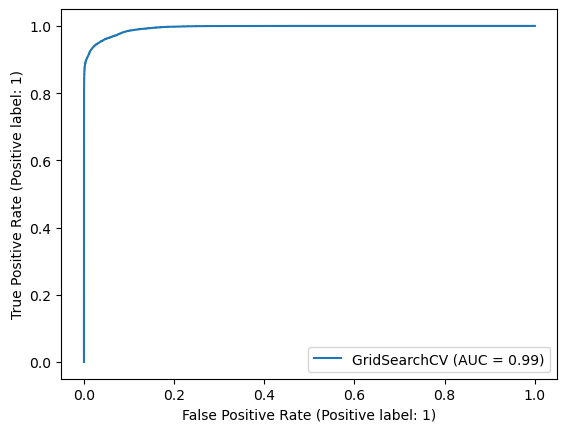

In [84]:
from sklearn.metrics import roc_auc_score,RocCurveDisplay
cat_auc_grid = roc_auc_score(y_test, y_pred_cat)
RocCurveDisplay.from_estimator(model_grid_cat, X_test, y_test)
print('ROC score for random search ', cat_auc_grid)
plt.show()

## random

In [85]:
# Random Search
cat_random_para = {
    'iterations': np.arange(50, 300, 50),  # Continuous iteration range
    'learning_rate': loguniform(1e-4, 1e0),  # Continuous learning rate range
    'depth': np.arange(3, 10)  # Continuous depth range
}
cat_random = CatBoostClassifier(silent=True)
random_cat = RandomizedSearchCV(cat_random, param_distributions=cat_random_para, n_iter=10, cv=3, scoring='accuracy')
model_random_cat = random_cat.fit(X_train, y_train)

#grid search results
print('Best grid search hyperparameters are:' +str(model_random_cat.best_params_))
print('Best grid search score is:' +str(model_random_cat.best_score_))

Best grid search hyperparameters are:{'depth': 6, 'iterations': 250, 'learning_rate': 0.1530738529237231}
Best grid search score is:0.9626186760829462


In [86]:
#by using best model results we are checking cross
from sklearn.metrics import accuracy_score
y_pred_cat_random = model_random_cat.predict(X_test)
print(y_pred_cat_random.shape)
print(y_test.shape)

print('Check the accuracy of model', accuracy_score(y_pred_cat_random,y_test))

(38912,)
(38912,)
Check the accuracy of model 0.9607833059210527


ROC score for random search  0.958228653167887


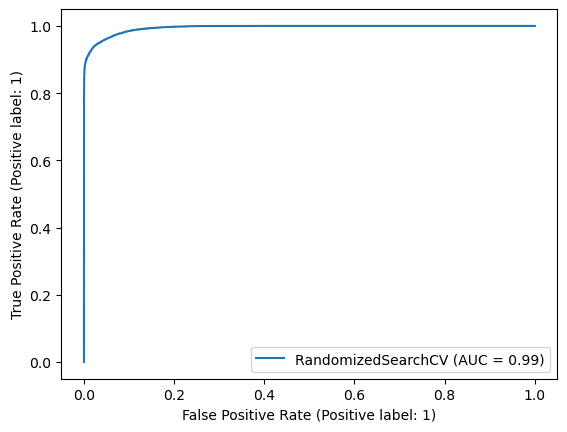

In [87]:
from sklearn.metrics import roc_auc_score,RocCurveDisplay
cat_auc_random = roc_auc_score(y_test, y_pred_cat_random)
RocCurveDisplay.from_estimator(model_random_cat, X_test, y_test)
print('ROC score for random search ', cat_auc_random)
plt.show()

# LighGBM

## grid

In [88]:
# Grid Search
lgbm_para = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

lgbm = LGBMClassifier(verbose=-1)
grid_lgbm = GridSearchCV(lgbm, param_grid=lgbm_para, cv=3, scoring='accuracy')
model_grid_lgbm = grid_lgbm.fit(X_train, y_train)

#grid search results
print('Best grid search hyperparameters are:' +str(model_grid_lgbm.best_params_))
print('Best grid search score is:' +str(model_grid_lgbm.best_score_))

Best grid search hyperparameters are:{'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200}
Best grid search score is:0.9620679831459696


In [89]:
#by using best model results we are checking cross
from sklearn.metrics import accuracy_score
y_pred_lgbm = model_grid_lgbm.predict(X_test)
print(y_pred_lgbm.shape)
print(y_test.shape)

print('Check the accuracy of model', accuracy_score(y_pred_lgbm,y_test))

(38912,)
(38912,)
Check the accuracy of model 0.9599866365131579


ROC score for random search  0.9576002596646708


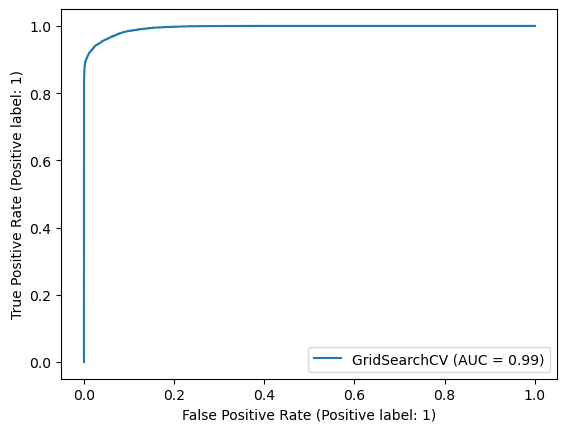

In [90]:
from sklearn.metrics import roc_auc_score,RocCurveDisplay
lgbm_auc_grid = roc_auc_score(y_test, y_pred_lgbm)
RocCurveDisplay.from_estimator(model_grid_lgbm, X_test, y_test)
print('ROC score for random search ', lgbm_auc_grid)
plt.show()

## random

In [91]:
# Random Search
lgbm_random_para = {
    'n_estimators': [50, 100, 200],
    'learning_rate': loguniform(1e-4, 1e0),
    'max_depth': np.arange(3, 10, 1)
}
lgbm_random = LGBMClassifier()
random_lgbm = RandomizedSearchCV(lgbm_random, param_distributions=lgbm_random_para, n_iter=100, cv=3, scoring='accuracy')
model_random_lgbm = random_lgbm.fit(X_train, y_train)

#grid search results
print('Best grid search hyperparameters are:' +str(model_random_lgbm.best_params_))
print('Best grid search score is:' +str(model_random_lgbm.best_score_))

Best grid search hyperparameters are:{'learning_rate': 0.18015242956638466, 'max_depth': 8, 'n_estimators': 200}
Best grid search score is:0.9627618605044811


In [92]:
#by using best model results we are checking cross
from sklearn.metrics import accuracy_score
y_pred_lgbm_random = model_random_lgbm.predict(X_test)
print(y_pred_lgbm_random.shape)
print(y_test.shape)

print('Check the accuracy of model', accuracy_score(y_pred_lgbm_random,y_test))

(38912,)
(38912,)
Check the accuracy of model 0.9603721217105263


ROC score for random search  0.9579065401546941


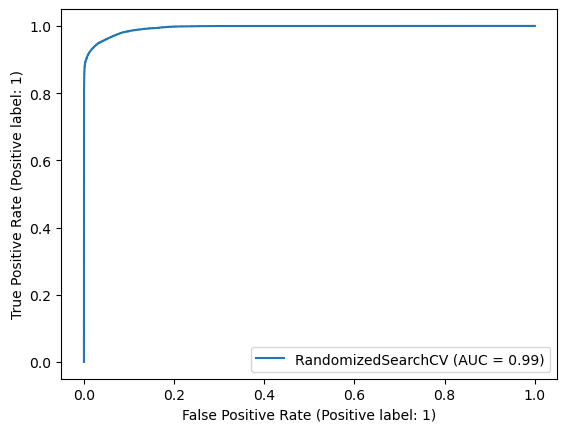

In [93]:
from sklearn.metrics import roc_auc_score,RocCurveDisplay
lgbm_auc_random = roc_auc_score(y_test, y_pred_lgbm_random)
RocCurveDisplay.from_estimator(model_random_lgbm, X_test, y_test)
print('ROC score for random search ', lgbm_auc_random)
plt.show()

# Comparison Table for All Models

In [94]:
# Create a comparison table
results = pd.DataFrame({
    'Model': ['CatBoost (Grid)', 'CatBoost (Random)',
              'LightGBM (Grid)', 'LightGBM (Random)'],
              
    'Best Score': [model_grid_cat.best_score_, model_random_cat.best_score_,
                   model_grid_lgbm.best_score_, model_random_lgbm.best_score_],
    
    'AUC': [cat_auc_grid, cat_auc_random,     
            lgbm_auc_grid, lgbm_auc_random]
})

# Sort the results DataFrame by 'AUC' in descending order
results_sorted = results.sort_values(by='AUC', ascending=False)

# Display the sorted comparison table
print(results_sorted)

               Model  Best Score       AUC
0    CatBoost (Grid)    0.962740  0.958565
1  CatBoost (Random)    0.962619  0.958229
3  LightGBM (Random)    0.962762  0.957907
2    LightGBM (Grid)    0.962068  0.957600


In [95]:
# Create a comparison table with corrected model list
results = pd.DataFrame({
    'Model': ['CatBoost (Grid)', 'CatBoost (Random)',  # Added missing comma
              'LightGBM (Grid)', 'LightGBM (Random)'],
              
    'Best Score': [model_grid_cat.best_score_, model_random_cat.best_score_,
                   model_grid_lgbm.best_score_, model_random_lgbm.best_score_],
    
    'AUC': [cat_auc_grid, cat_auc_random,     
            lgbm_auc_grid, lgbm_auc_random]
})

# Sort the results DataFrame by 'AUC' in descending order
results_sorted = results.sort_values(by='AUC', ascending=False)

# Display the sorted comparison table
print(results_sorted)


               Model  Best Score       AUC
0    CatBoost (Grid)    0.962740  0.958565
1  CatBoost (Random)    0.962619  0.958229
3  LightGBM (Random)    0.962762  0.957907
2    LightGBM (Grid)    0.962068  0.957600


In [93]:
import joblib
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

# Assuming model_grid_cat is your trained CatBoost model
# Assuming model_random_lgbm is your trained LightGBM (Random) model
joblib.dump(model_grid_cat, 'catboost_model.joblib')
joblib.dump(model_random_lgbm, 'lightgbm_model.joblib')
 

NameError: name 'model_grid_cat' is not defined

In [97]:
import os
print(os.listdir())


['.DS_Store', 'new_passengers.csv', 'airline_passenger_satisfaction.csv', 'Passenger_Satisfaction_System-Copy1.ipynb', 'catboost_model.joblib', 'lightgbm_model.joblib', 'model', 'app.py', '.ipynb_checkpoints', 'Passenger_Satisfaction_System.ipynb', '.git', 'catboost_info']


In [87]:
import os

# List files in the current directory
print(os.listdir('.'))


['.DS_Store', 'new_passengers.csv', 'requirements.txt', 'airline_passenger_satisfaction.csv', 'Passenger_Satisfaction_System-Copy1.ipynb', 'catboost_model.joblib', '.devcontainer', 'lightgbm_model.joblib', 'app.py', '.ipynb_checkpoints', 'Passenger_Satisfaction_System.ipynb', '.git', 'catboost_info']


In [99]:
new_passengers.to_csv('new_passengers.csv', index=False)


In [89]:
from sklearn.metrics import make_scorer

def my_custom_scorer(y_true, y_pred):
    # Define your custom scoring logic here
    return some_metric_value

# Now, recreate the scorer object
scorer = make_scorer(my_custom_scorer)


In [91]:
import sklearn
print(sklearn.__version__)


1.5.1
